# Set up : normal ,  preprocessed

### **All Libraries**

In [1]:
# Data Handling
import pandas as pd

# Text Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Training & Splitting
from sklearn.model_selection import train_test_split

# Models
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics
from sklearn.metrics import confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Timing Execution
import time


### **Preparation du fichier / Analyse**

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("IMDB_RAW.csv")

# Rename the first two columns
df.rename(columns={df.columns[0]: "Text", df.columns[1]: "Label"}, inplace=True)

# Replace values in the Label column
df["Label"] = df["Label"].replace({"positive": "POS", "negative": "NEG"})

# Count duplicates before removing them
duplicates_count = df.duplicated(subset=["Text"]).sum()

# Remove duplicate rows based on the "Text" column
df.drop_duplicates(subset=["Text"], keep="first", inplace=True)

# Save the modified CSV file
#df.to_csv("IMDB_PN.csv", index=False)

print(f"Processing complete: Columns renamed, labels updated, and {duplicates_count} duplicate(s) removed.")

Processing complete: Columns renamed, labels updated, and 418 duplicate(s) removed.


Sentiment Distribution:
 Label
POS    24884
NEG    24698
Name: count, dtype: int64


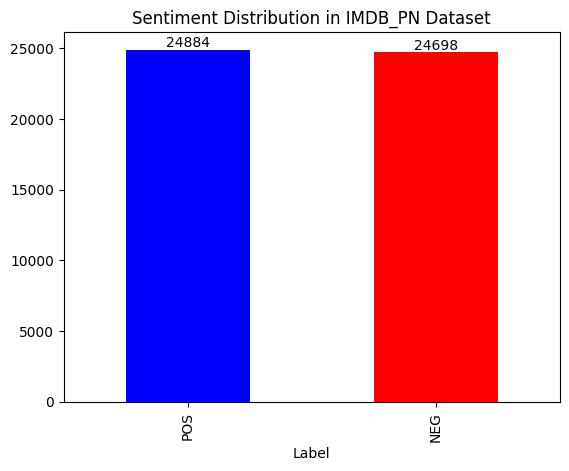

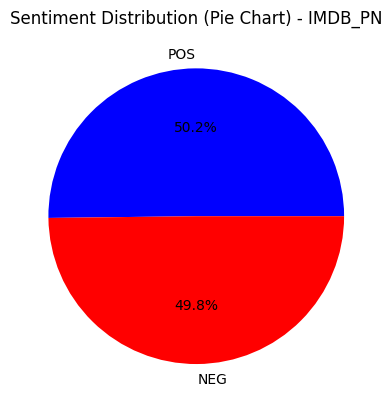

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
#df = pd.read_csv("IMDB_PN.csv")

# Count sentiment occurrences
sentiment_counts = df["Label"].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Define colors for the 2 ratings
colors = ["blue", "red"]

# Bar Chart
ax = sentiment_counts.plot(kind="bar", color=colors)
plt.title("Sentiment Distribution in IMDB_PN Dataset")

# Add the exact number on top of each bar
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)  # Adjust vertical position if needed

#plt.savefig("bar_chart_pn.png")
plt.show()

# Pie Chart
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=colors)
plt.title("Sentiment Distribution (Pie Chart) - IMDB_PN")
plt.ylabel("")
#plt.savefig("pie_chart_pn.png")
print("\n")
plt.show()


In [4]:
#df = pd.read_csv("IMDB_PN.csv")

# Convert POS → 1 and NEG → 0
df["Label"] = df["Label"].replace({"POS": 1, "NEG": 0})

df.to_csv("IMDB.csv", index=False)

<ipython-input-4-b063b260e1dc>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Label"] = df["Label"].replace({"POS": 1, "NEG": 0})


### **Prétraitement**

In [5]:
import pandas as pd
import string
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.isri import ISRIStemmer
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
def remove_br_tags(text):
    if isinstance(text, str):
        return text.replace('<br />', ' ')
    return ''

def convert_to_lowercase(text):
    if isinstance(text, str):
        return text.lower()
    return ''

def remove_non_latin(text):
    if isinstance(text, str):
        return re.sub(r'[^a-z\s]', ' ', text)  # Replace non-latin characters with a space
    return ''

def tokenization(text):
    if isinstance(text, str):
        return re.findall(r'\S+', text)  # Matches sequences of non-space characters
    return []

def remove_ENG_stopwords(tokens):
    if isinstance(tokens, list):
        return [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    return []

def get_root(word, stemmer):
    if isinstance(word, str):
        return stemmer.stem(word)
    return word

def stemming_ENG(tokens):
    stemmer = PorterStemmer()
    return [get_root(token, stemmer) for token in tokens]

def rejoin_tokens(tokens):
    filtered_tokens = [token for token in tokens if isinstance(token, str) and token.strip()]
    return ' '.join(filtered_tokens)

In [7]:
def IMDB_pretraitement(text):
    if isinstance(text, str):
        # Step 1: Remove <br /> tags
        text = remove_br_tags(text)

        # Step 4: Convert to lowercase
        text = convert_to_lowercase(text)

        # Step 5: Remove non-latin characters
        text = remove_non_latin(text)

        # Step 6: Tokenization (split text into tokens)
        tokens = tokenization(text)

        # Step 7: Remove English stopwords
        tokens = remove_ENG_stopwords(tokens)

        # Step 8: Apply stemming (Porter Stemmer for English)
        tokens = stemming_ENG(tokens)

        # Step 9: Rejoin tokens into a single string
        return rejoin_tokens(tokens)

    return ''

In [8]:
print(f"Start processing IMDB ...\n")
IMDB = pd.read_csv("/content/IMDB.csv")
IMDB["Text"] = [IMDB_pretraitement(text) for text in df["Text"]]
IMDB.to_csv("/content/IMDB_Pre.csv", index=False)
print(f"Finished processing IMDB!\n")

Start processing IMDB ...

Finished processing IMDB!



# Set up : Algorithms Functions

### Libraries

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

### **Visualisation / Metrics**

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_results(confusion_matrix, y_test, y_pred, dataset_name, algorithm_name, execution_time, num_positive, num_negative):
    TN = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TP = confusion_matrix[1][1]

    epsilon = 1e-10
    accuracy = (TP + TN) / (TP + TN + FP + FN + epsilon)

    # Per-class metrics
    precision_per_class = precision_score(y_test, y_pred, average=None, labels=[0, 1], zero_division=0)
    recall_per_class = recall_score(y_test, y_pred, average=None, labels=[0, 1], zero_division=0)
    f1_per_class = f1_score(y_test, y_pred, average=None, labels=[0, 1], zero_division=0)
    support_0 = sum(y_test == 0)
    support_1 = sum(y_test == 1)

    # Prepare result dict (optional to return it)
    results = {
        "Dataset": dataset_name,
        "Algorithm": algorithm_name,
        "Confusion Matrix": confusion_matrix,
        "Accuracy": round(accuracy, 4),
        "Precision_0": round(precision_per_class[0], 4),
        "Recall_0": round(recall_per_class[0], 4),
        "F1_0": round(f1_per_class[0], 4),
        "Support_0": support_0,
        "Precision_1": round(precision_per_class[1], 4),
        "Recall_1": round(recall_per_class[1], 4),
        "F1_1": round(f1_per_class[1], 4),
        "Support_1": support_1,
        "Number of Positive Samples": num_positive,
        "Number of Negative Samples": num_negative,
        "Execution Time (s)": round(execution_time, 4)
    }

    # --- Visualization ---
    title = f"{dataset_name} with {algorithm_name}"
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6), gridspec_kw={'width_ratios': [1, 1.1]})
    fig.suptitle(title, fontsize=14, fontweight='bold')

    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1,
                square=True, linewidths=0, linecolor='white')
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('True Label')
    ax1.set_title('Confusion Matrix', fontsize=12)
    ax1.set_xticklabels(['Negative', 'Positive'])
    ax1.set_yticklabels(['Negative', 'Positive'])

    ax2.axis('off')
    ax2.set_title('Statistics Summary', fontsize=12, fontweight='bold', loc='left')

    stats_text = [
        f"Accuracy: {results['Accuracy']}",
        f"Execution Time: {execution_time:.2f} sec",
        f"Training Positives: {num_positive}",
        f"Training Negatives: {num_negative}"
    ]
    y_text = 0.95
    for line in stats_text:
        ax2.text(0.01, y_text, line, fontsize=11, va='top')
        y_text -= 0.07

    col_labels = ['Precision', 'Recall', 'F1 Score', 'Support']
    row_labels = ['Class 0 (Neg)', 'Class 1 (Pos)']
    cell_data = [
        [results['Precision_0'], results['Recall_0'], results['F1_0'], results['Support_0']],
        [results['Precision_1'], results['Recall_1'], results['F1_1'], results['Support_1']]
    ]
    table = ax2.table(
        cellText=cell_data,
        rowLabels=row_labels,
        colLabels=col_labels,
        cellLoc='center',
        colLoc='center',
        loc='center',
        bbox=[0.01, 0.05, 0.9, 0.3]
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(0.95, 1.0)

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

    return results


### **Vectorize**

In [11]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

def vectorize_text_data(csv_path, sample_percentage=1.0):
    df = pd.read_csv(csv_path, encoding='utf-8-sig')
    df = df[df['Text'].notna() & (df['Text'] != "")]

    if sample_percentage < 1.0:
        df = df.sample(frac=sample_percentage, random_state=42).reset_index(drop=True)

    X = df['Text']
    y = df['Label']

    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorization
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    return X_train_tfidf, X_test_tfidf, y_train, y_test, df

### **Traitement**

In [12]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

def run_model_on_vectorized_data(X_train_tfidf, X_test_tfidf, y_train, y_test, df, model_class, model_name, dataset_name, model_params=None):
    # Create and Train Model
    model = model_class(**(model_params or {}))
    start_time = time.time()
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    execution_time = time.time() - start_time

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Metrics
    results = analyze_and_visualize_results(
        confusion_matrix=cm,
        y_test=y_test,
        y_pred=y_pred,
        dataset_name=dataset_name,
        algorithm_name=model_name,
        execution_time=execution_time,
        num_positive=len(df[df['Label'] == 1]),
        num_negative=len(df[df['Label'] == 0])
    )

    return results


### **Hyper Parameter Testing Function (one datasets)**

In [13]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import time

def test_model_with_param_from_vectorized_data(X_train_tfidf, X_test_tfidf, y_train, y_test, df, model_class, param_name, param_values, dataset_label="Dataset"):
    print("\n\n")
    f1_scores_class_0 = []
    f1_scores_class_1 = []
    avg_f1_scores = []
    valid_param_values = []

    for value in param_values:
        try:
            model = model_class(**{param_name: value})
            start_time = time.time()
            model.fit(X_train_tfidf, y_train)
            y_pred = model.predict(X_test_tfidf)
            exec_time = time.time() - start_time

            f1_per_class = f1_score(y_test, y_pred, average=None, labels=[0, 1])
            f1_scores_class_0.append(f1_per_class[0])
            f1_scores_class_1.append(f1_per_class[1])
            avg = (f1_per_class[0] + f1_per_class[1]) / 2
            avg_f1_scores.append(avg)
            valid_param_values.append(value)

            print(f"{param_name}: {value} | F1[0]: {round(f1_per_class[0], 4)} | F1[1]: {round(f1_per_class[1], 4)} | Avg F1: {round(avg, 4)} | Time: {round(exec_time, 4)}s")

        except Exception as e:
            print(f"Skipping {param_name} = {value} due to error: {e}")

    if not valid_param_values:
        print(" No successful parameter values to display.")
        return None  # Explicit return when nothing worked

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(valid_param_values, f1_scores_class_0, marker='o', linestyle='--', color='red', label='F1 Score - Class 0 (Negative)')
    plt.plot(valid_param_values, f1_scores_class_1, marker='o', linestyle='-', color='blue', label='F1 Score - Class 1 (Positive)')
    plt.title(f'{dataset_label}\nF1 Score vs {param_name}', fontsize=14, fontweight='bold')
    plt.xlabel(param_name)
    plt.ylabel('F1 Score')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Summary
    best_idx = avg_f1_scores.index(max(avg_f1_scores))
    best_param = valid_param_values[best_idx]
    best_score = avg_f1_scores[best_idx]

    print(f"\nBest {param_name} = {best_param} with Avg F1 = {round(best_score, 4)}")

    return best_param  # returns the best value

### **Victorize all data**

In [14]:
# === Global table to store results from all algorithms
all_Algo_results = pd.DataFrame()

# === Step 0: Load and vectorize datasets
X_train1, X_test1, y_train1, y_test1, df1 = vectorize_text_data("IMDB.csv",0.02)
X_train2, X_test2, y_train2, y_test2, df2 = vectorize_text_data("IMDB_Pre.csv",0.02)

datasets = {
    "IMDB":                         (X_train1, X_test1, y_train1, y_test1, df1),
    "IMDB_Preprocessed":           (X_train2, X_test2, y_train2, y_test2, df2),
}


# IMDB Dataset - Full Comparison of 8 Algorithms

## **Multinomial Naive Bayes**


=== Step 1: MultinomialNB with DEFAULT parameters ===


-- Running default model on IMDB --


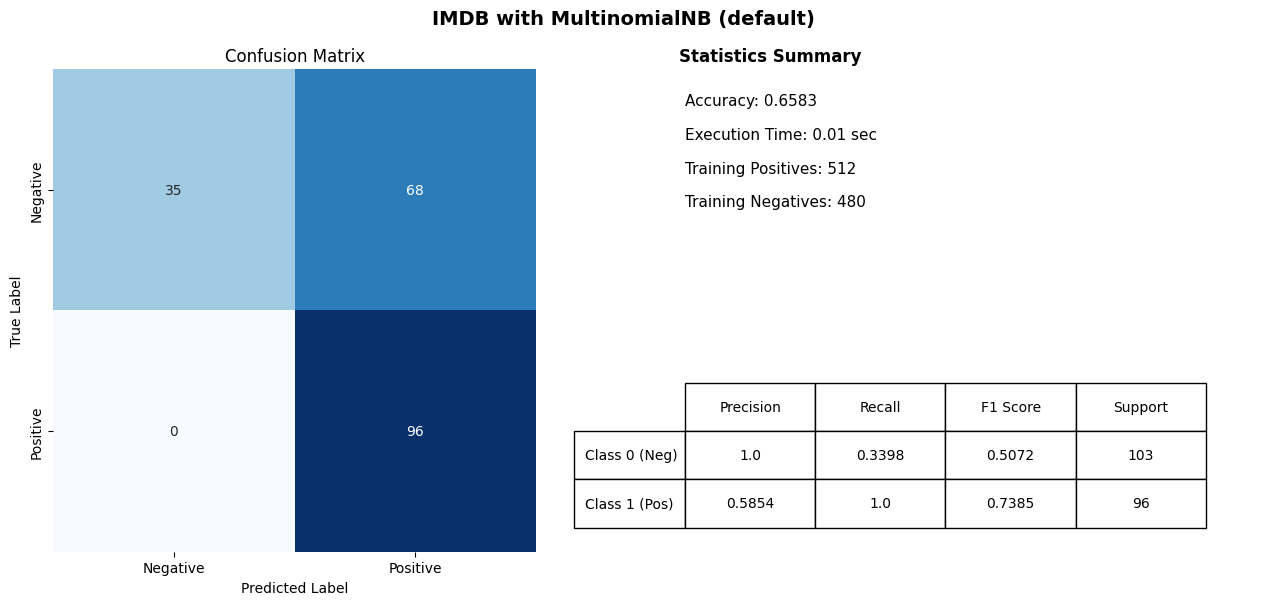


-- Running default model on IMDB_Preprocessed --


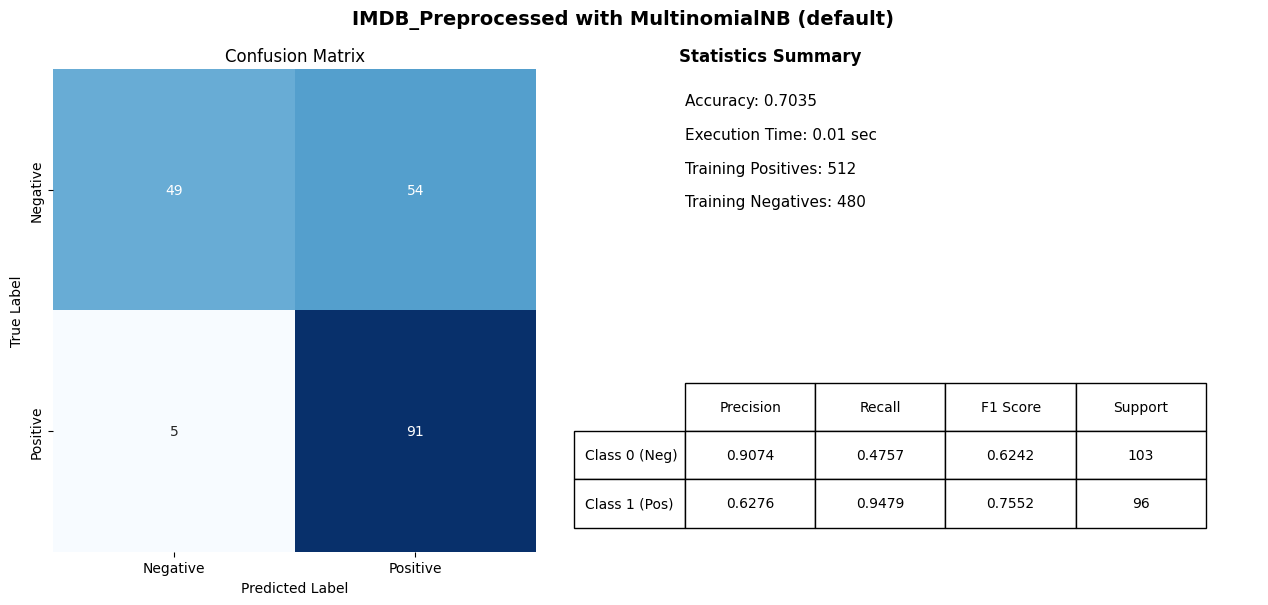


=== Step 2: Tuning alpha for MultinomialNB ===


-- Tuning IMDB --



alpha: 0.0001 | F1[0]: 0.6286 | F1[1]: 0.7085 | Avg F1: 0.6685 | Time: 0.0057s
alpha: 0.01 | F1[0]: 0.7204 | F1[1]: 0.7547 | Avg F1: 0.7376 | Time: 0.0053s
alpha: 0.05 | F1[0]: 0.734 | F1[1]: 0.7619 | Avg F1: 0.748 | Time: 0.0045s
alpha: 0.1 | F1[0]: 0.7487 | F1[1]: 0.7773 | Avg F1: 0.763 | Time: 0.0042s
alpha: 0.5 | F1[0]: 0.6369 | F1[1]: 0.7635 | Avg F1: 0.7002 | Time: 0.0029s
alpha: 1.0 | F1[0]: 0.5072 | F1[1]: 0.7385 | Avg F1: 0.6229 | Time: 0.0031s
alpha: 2.0 | F1[0]: 0.4031 | F1[1]: 0.7138 | Avg F1: 0.5584 | Time: 0.0029s
alpha: 5.0 | F1[0]: 0.1607 | F1[1]: 0.6713 | Avg F1: 0.416 | Time: 0.0029s
alpha: 10.0 | F1[0]: 0.0381 | F1[1]: 0.6553 | Avg F1: 0.3467 | Time: 0.0029s


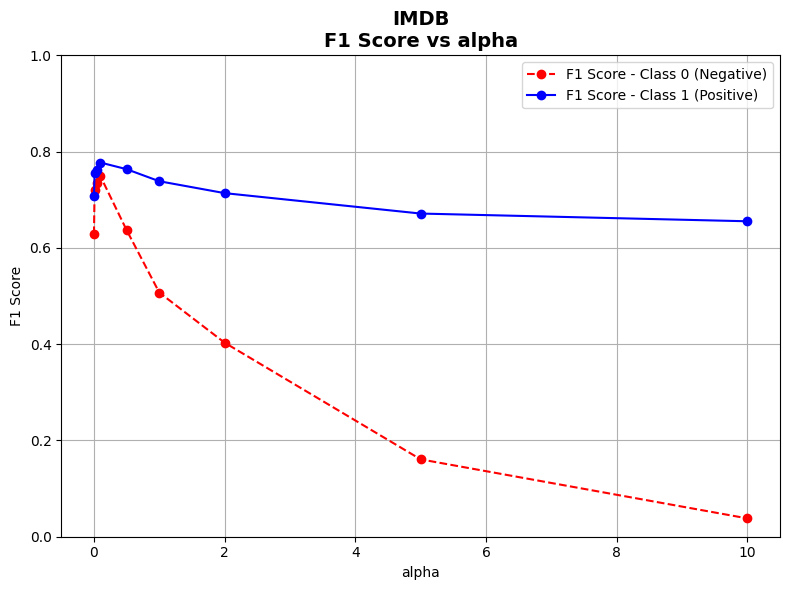


Best alpha = 0.1 with Avg F1 = 0.763

-- Tuning IMDB_Preprocessed --



alpha: 0.0001 | F1[0]: 0.5795 | F1[1]: 0.6667 | Avg F1: 0.6231 | Time: 0.0048s
alpha: 0.01 | F1[0]: 0.6957 | F1[1]: 0.7383 | Avg F1: 0.717 | Time: 0.0048s
alpha: 0.05 | F1[0]: 0.7204 | F1[1]: 0.7547 | Avg F1: 0.7376 | Time: 0.0027s
alpha: 0.1 | F1[0]: 0.7487 | F1[1]: 0.7773 | Avg F1: 0.763 | Time: 0.0025s
alpha: 0.5 | F1[0]: 0.7143 | F1[1]: 0.7913 | Avg F1: 0.7528 | Time: 0.0028s
alpha: 1.0 | F1[0]: 0.6242 | F1[1]: 0.7552 | Avg F1: 0.6897 | Time: 0.0026s
alpha: 2.0 | F1[0]: 0.6065 | F1[1]: 0.749 | Avg F1: 0.6777 | Time: 0.0026s
alpha: 5.0 | F1[0]: 0.4672 | F1[1]: 0.7203 | Avg F1: 0.5937 | Time: 0.0026s
alpha: 10.0 | F1[0]: 0.3906 | F1[1]: 0.7111 | Avg F1: 0.5509 | Time: 0.0025s


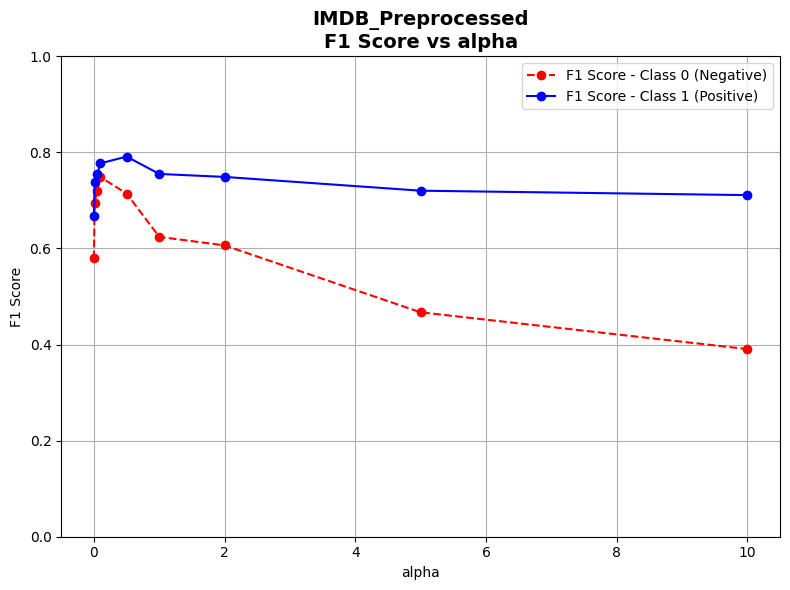


Best alpha = 0.1 with Avg F1 = 0.763

=== Step 3: MultinomialNB with BEST alpha ===


-- IMDB with best alpha = 0.1 --


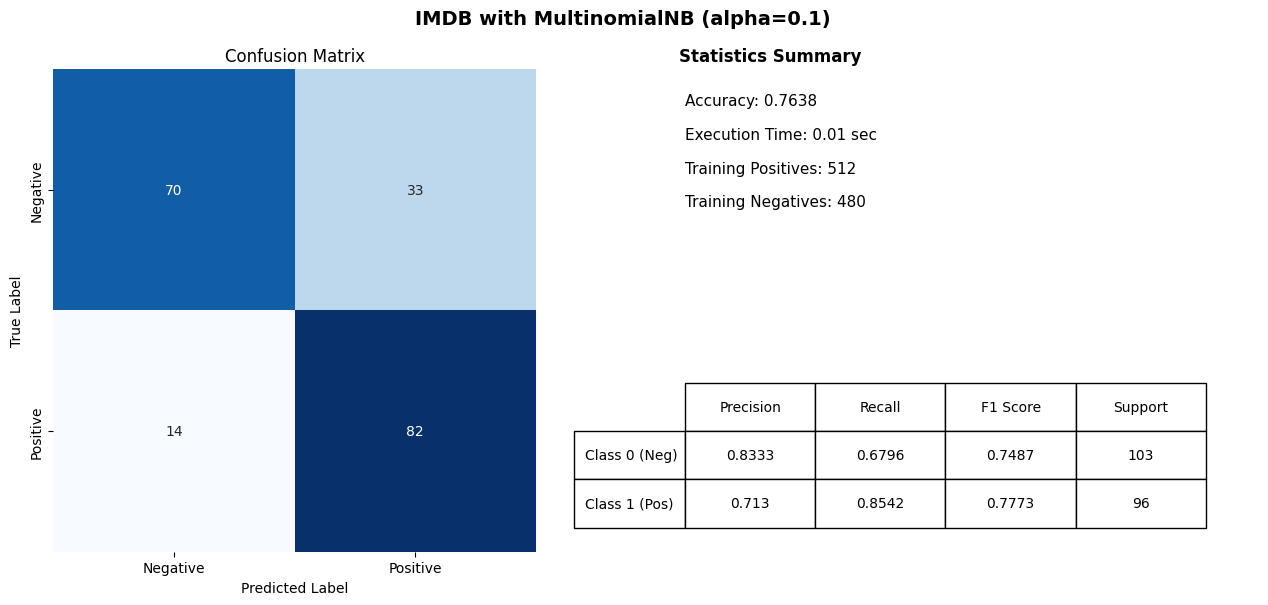


-- IMDB_Preprocessed with best alpha = 0.1 --


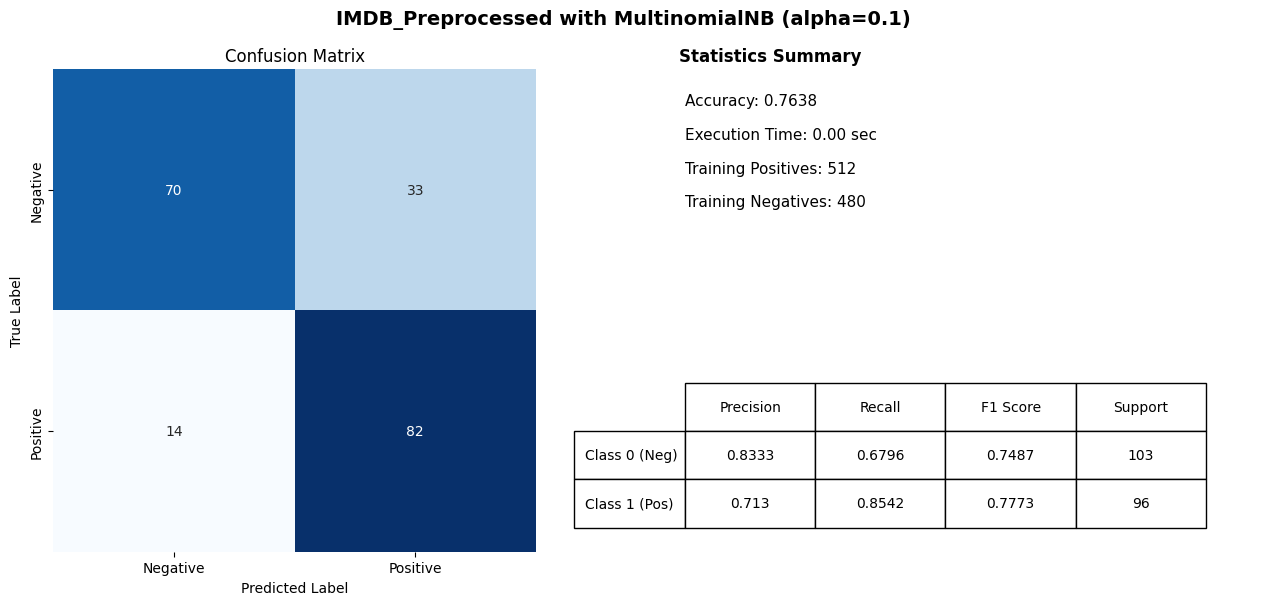

Results saved to 'MultinomialNB_Results.csv'


In [15]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

param_values = [0.0001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
best_params = {}
all_MNB_results = []

# === Step 1: Run MultinomialNB with default alpha
print("\n=== Step 1: MultinomialNB with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=MultinomialNB,
        model_name="MultinomialNB (default)",
        dataset_name=label
    )
    result["Model Group"] = "MultinomialNB"
    all_MNB_results.append(result)

# === Step 2: Hyperparameter tuning
print("\n=== Step 2: Tuning alpha for MultinomialNB ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_alpha = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=MultinomialNB,
        param_name="alpha",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_alpha

# === Step 3: Evaluate using best alpha
print("\n=== Step 3: MultinomialNB with BEST alpha ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_alpha = best_params[label]
    print(f"\n-- {label} with best alpha = {best_alpha} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=MultinomialNB,
        model_name=f"MultinomialNB (alpha={best_alpha})",
        dataset_name=label,
        model_params={"alpha": best_alpha}
    )
    result["Model Group"] = "MultinomialNB"
    all_MNB_results.append(result)

# === Save and append to global results
results_df = pd.DataFrame(all_MNB_results)

# Save to individual CSV
results_df.to_csv("MultinomialNB_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'MultinomialNB_Results.csv'")

# Append to master table for all algorithms
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)

## **Complement Naive Bayes**


=== Step 1: ComplementNB with DEFAULT parameters ===


-- Running default model on IMDB --


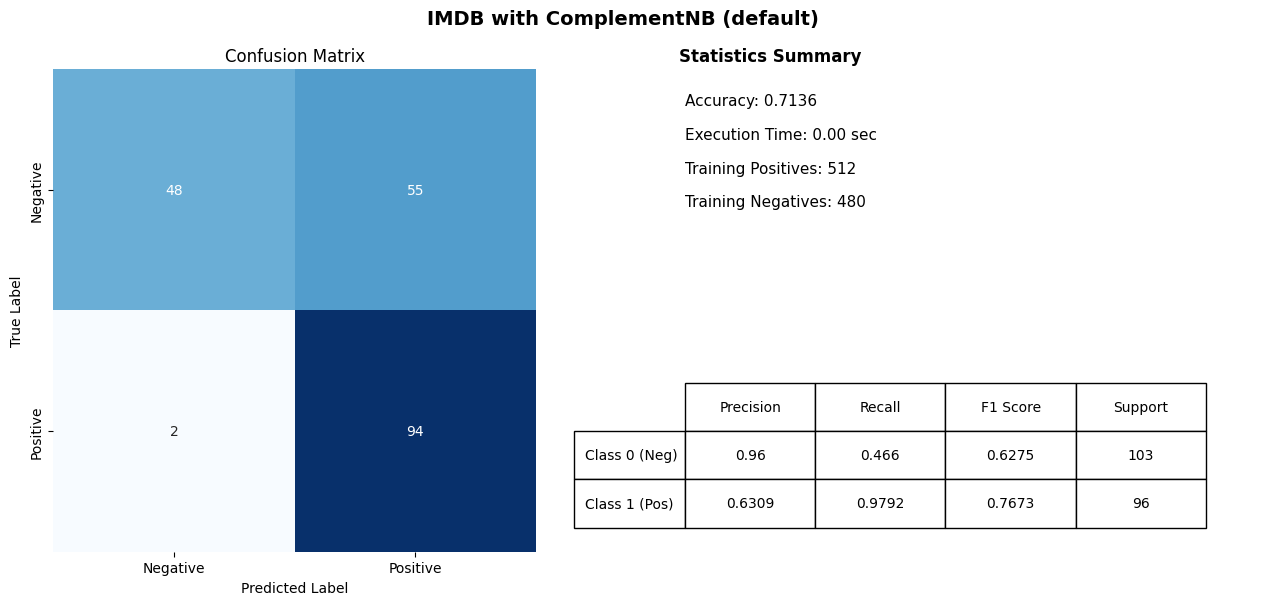


-- Running default model on IMDB_Preprocessed --


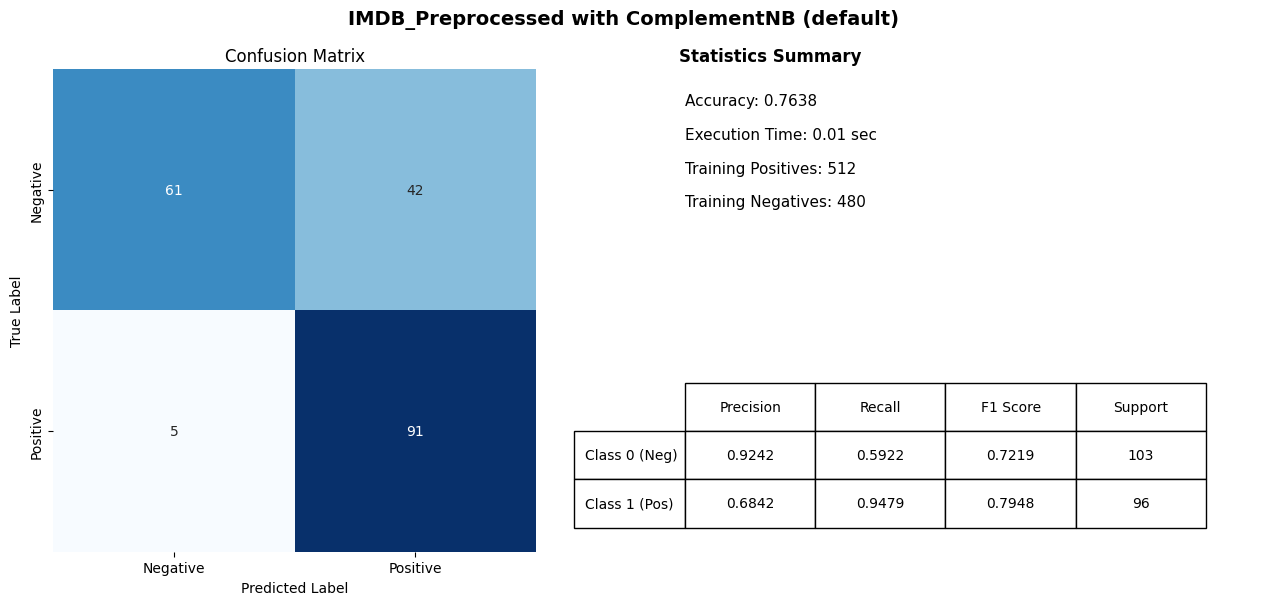


=== Step 2: Tuning alpha for ComplementNB ===


-- Tuning IMDB --



alpha: 0.0001 | F1[0]: 0.6364 | F1[1]: 0.7117 | Avg F1: 0.674 | Time: 0.0063s
alpha: 0.01 | F1[0]: 0.7166 | F1[1]: 0.7488 | Avg F1: 0.7327 | Time: 0.006s
alpha: 0.05 | F1[0]: 0.7604 | F1[1]: 0.7767 | Avg F1: 0.7686 | Time: 0.0038s
alpha: 0.1 | F1[0]: 0.7857 | F1[1]: 0.7921 | Avg F1: 0.7889 | Time: 0.0037s
alpha: 0.5 | F1[0]: 0.7219 | F1[1]: 0.7948 | Avg F1: 0.7583 | Time: 0.0032s
alpha: 1.0 | F1[0]: 0.6275 | F1[1]: 0.7673 | Avg F1: 0.6974 | Time: 0.003s
alpha: 2.0 | F1[0]: 0.4706 | F1[1]: 0.7252 | Avg F1: 0.5979 | Time: 0.0029s
alpha: 5.0 | F1[0]: 0.378 | F1[1]: 0.7085 | Avg F1: 0.5432 | Time: 0.0029s
alpha: 10.0 | F1[0]: 0.2542 | F1[1]: 0.6857 | Avg F1: 0.47 | Time: 0.003s


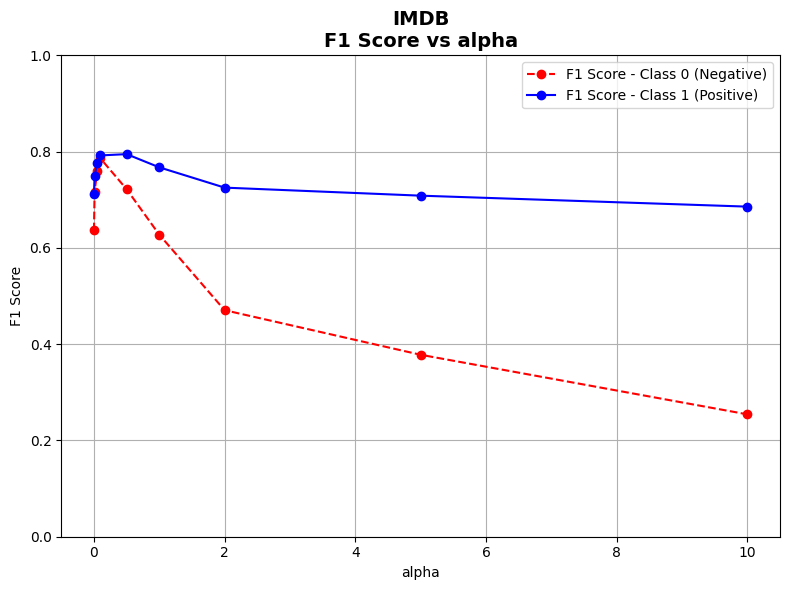


Best alpha = 0.1 with Avg F1 = 0.7889

-- Tuning IMDB_Preprocessed --



alpha: 0.0001 | F1[0]: 0.6034 | F1[1]: 0.6758 | Avg F1: 0.6396 | Time: 0.0051s
alpha: 0.01 | F1[0]: 0.7166 | F1[1]: 0.7488 | Avg F1: 0.7327 | Time: 0.004s
alpha: 0.05 | F1[0]: 0.7358 | F1[1]: 0.7512 | Avg F1: 0.7435 | Time: 0.0027s
alpha: 0.1 | F1[0]: 0.7708 | F1[1]: 0.7864 | Avg F1: 0.7786 | Time: 0.0026s
alpha: 0.5 | F1[0]: 0.7598 | F1[1]: 0.8037 | Avg F1: 0.7817 | Time: 0.0024s
alpha: 1.0 | F1[0]: 0.7219 | F1[1]: 0.7948 | Avg F1: 0.7583 | Time: 0.0025s
alpha: 2.0 | F1[0]: 0.6667 | F1[1]: 0.7712 | Avg F1: 0.7189 | Time: 0.0025s
alpha: 5.0 | F1[0]: 0.6584 | F1[1]: 0.7679 | Avg F1: 0.7132 | Time: 0.0025s
alpha: 10.0 | F1[0]: 0.6369 | F1[1]: 0.7635 | Avg F1: 0.7002 | Time: 0.0025s


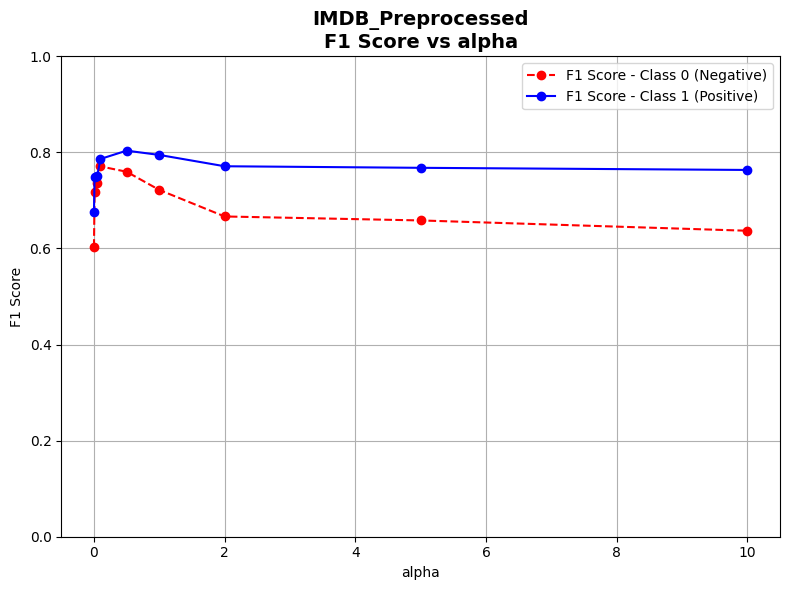


Best alpha = 0.5 with Avg F1 = 0.7817

=== Step 3: ComplementNB with BEST alpha ===


-- IMDB with best alpha = 0.1 --


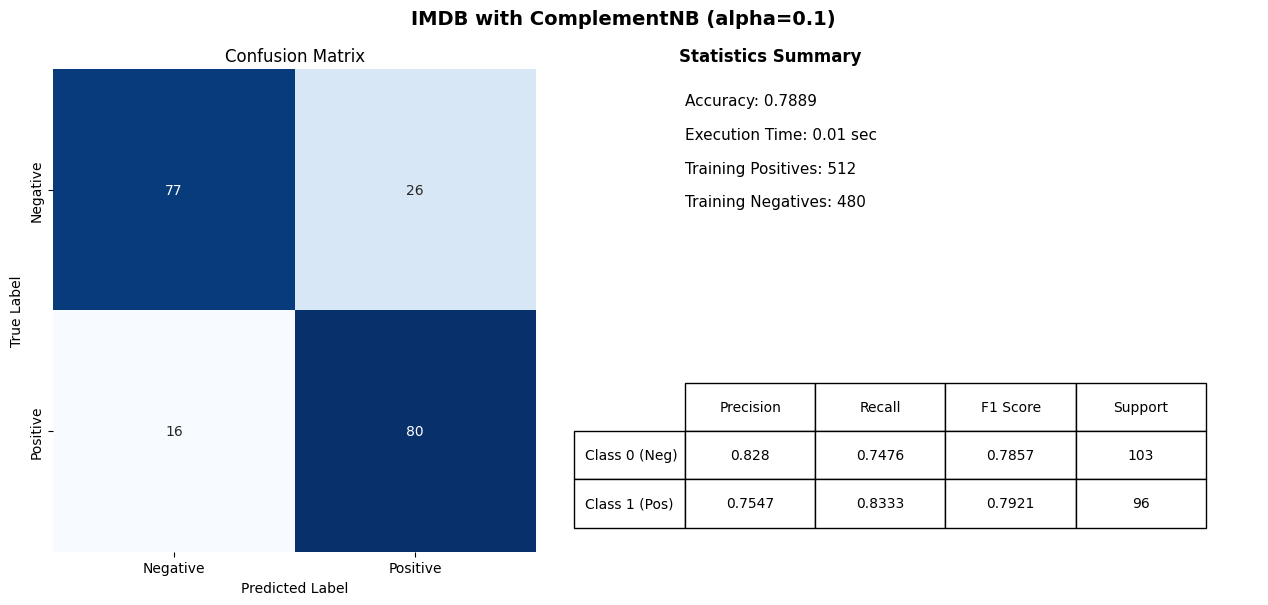


-- IMDB_Preprocessed with best alpha = 0.5 --


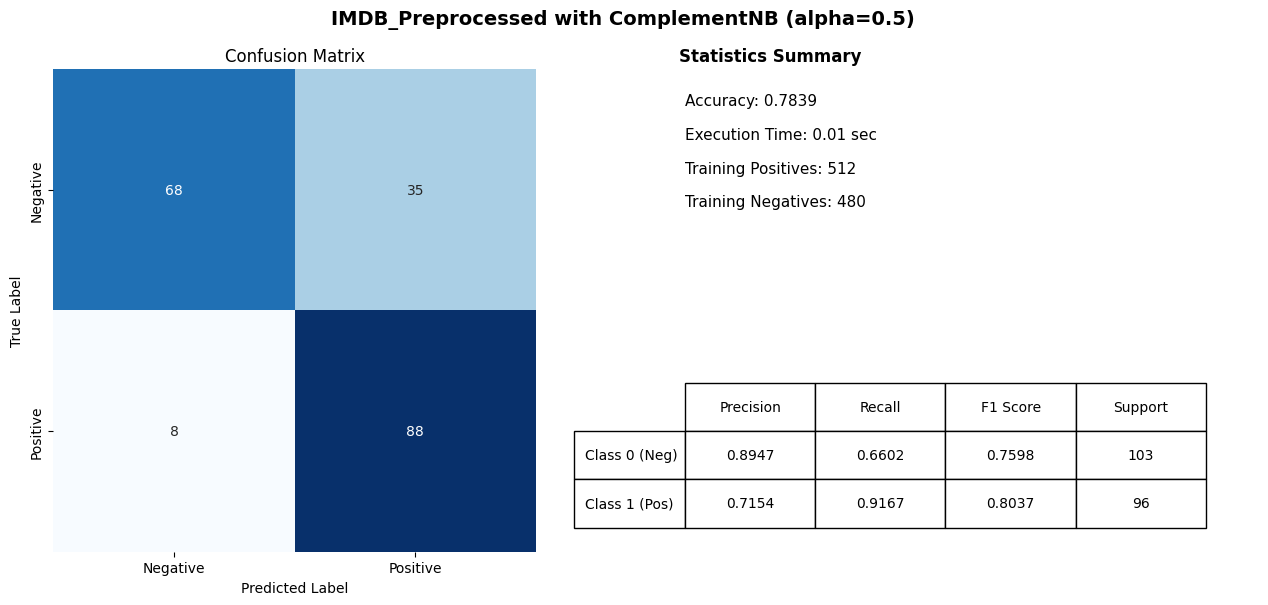

Results saved to 'ComplementNB_Results.csv'


In [16]:
from sklearn.naive_bayes import ComplementNB

param_values = [0.0001, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
best_params = {}
all_CNB_results = []

# === Step 1: Run ComplementNB with default alpha
print("\n=== Step 1: ComplementNB with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=ComplementNB,
        model_name="ComplementNB (default)",
        dataset_name=label
    )
    result["Model Group"] = "ComplementNB"
    all_CNB_results.append(result)

# === Step 2: Hyperparameter tuning
print("\n=== Step 2: Tuning alpha for ComplementNB ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_alpha = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=ComplementNB,
        param_name="alpha",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_alpha

# === Step 3: Evaluate using best alpha
print("\n=== Step 3: ComplementNB with BEST alpha ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_alpha = best_params[label]
    print(f"\n-- {label} with best alpha = {best_alpha} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=ComplementNB,
        model_name=f"ComplementNB (alpha={best_alpha})",
        dataset_name=label,
        model_params={"alpha": best_alpha}
    )
    result["Model Group"] = "ComplementNB"
    all_CNB_results.append(result)

# === Save and append to global results
results_df = pd.DataFrame(all_CNB_results)

# Save to individual CSV
results_df.to_csv("ComplementNB_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'ComplementNB_Results.csv'")

# Append to master table for all algorithms
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **SVM (Linear)**


=== Step 1: LinearSVC with DEFAULT parameters ===


-- Running default model on IMDB --


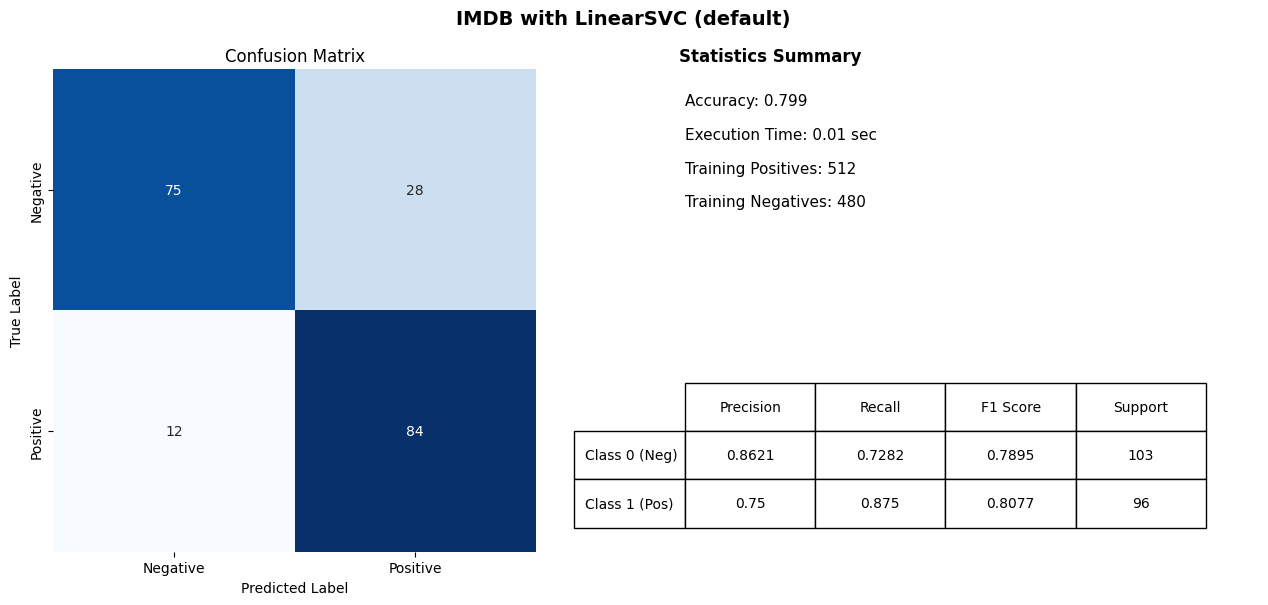


-- Running default model on IMDB_Preprocessed --


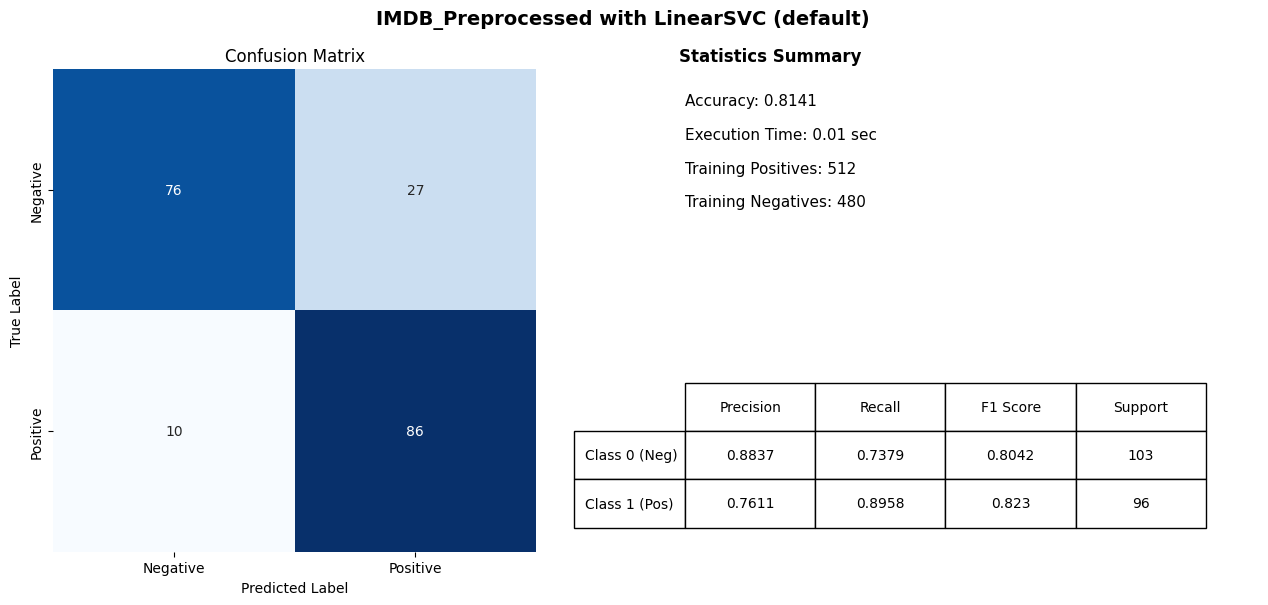


=== Step 2: Tuning C for LinearSVC ===


-- Tuning IMDB --



C: 0.001 | F1[0]: 0.0 | F1[1]: 0.6508 | Avg F1: 0.3254 | Time: 0.0088s
C: 0.01 | F1[0]: 0.2975 | F1[1]: 0.6931 | Avg F1: 0.4953 | Time: 0.0081s
C: 0.1 | F1[0]: 0.7486 | F1[1]: 0.7945 | Avg F1: 0.7716 | Time: 0.0056s
C: 0.5 | F1[0]: 0.7979 | F1[1]: 0.819 | Avg F1: 0.8085 | Time: 0.0079s
C: 1.0 | F1[0]: 0.7895 | F1[1]: 0.8077 | Avg F1: 0.7986 | Time: 0.0097s
C: 2.0 | F1[0]: 0.7958 | F1[1]: 0.8116 | Avg F1: 0.8037 | Time: 0.0117s
C: 5.0 | F1[0]: 0.7876 | F1[1]: 0.8 | Avg F1: 0.7938 | Time: 0.0132s
C: 10.0 | F1[0]: 0.7876 | F1[1]: 0.8 | Avg F1: 0.7938 | Time: 0.0145s


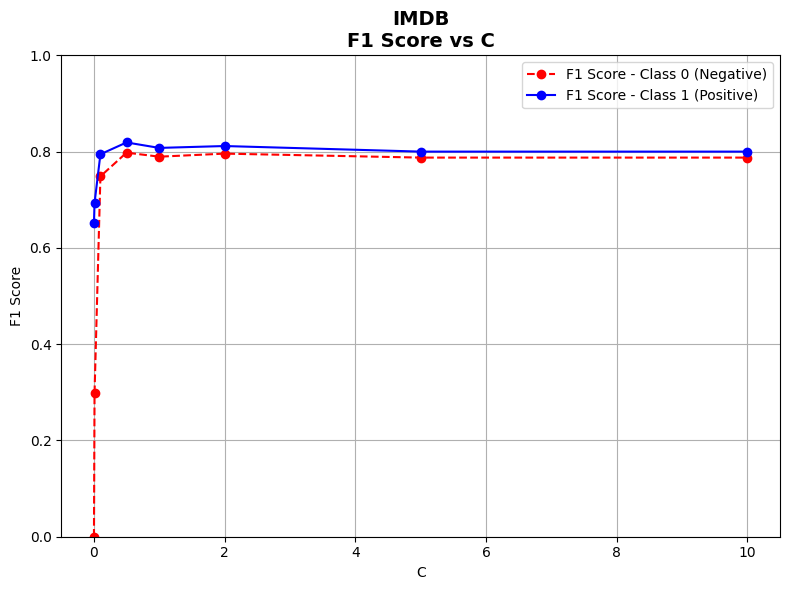


Best C = 0.5 with Avg F1 = 0.8085

-- Tuning IMDB_Preprocessed --



C: 0.001 | F1[0]: 0.0 | F1[1]: 0.6508 | Avg F1: 0.3254 | Time: 0.0053s
C: 0.01 | F1[0]: 0.3651 | F1[1]: 0.7059 | Avg F1: 0.5355 | Time: 0.0055s
C: 0.1 | F1[0]: 0.7416 | F1[1]: 0.7909 | Avg F1: 0.7662 | Time: 0.0042s
C: 0.5 | F1[0]: 0.7717 | F1[1]: 0.8037 | Avg F1: 0.7877 | Time: 0.0064s
C: 1.0 | F1[0]: 0.8042 | F1[1]: 0.823 | Avg F1: 0.8136 | Time: 0.0068s
C: 2.0 | F1[0]: 0.7979 | F1[1]: 0.819 | Avg F1: 0.8085 | Time: 0.0076s
C: 5.0 | F1[0]: 0.7914 | F1[1]: 0.8152 | Avg F1: 0.8033 | Time: 0.0097s
C: 10.0 | F1[0]: 0.7914 | F1[1]: 0.8152 | Avg F1: 0.8033 | Time: 0.0096s


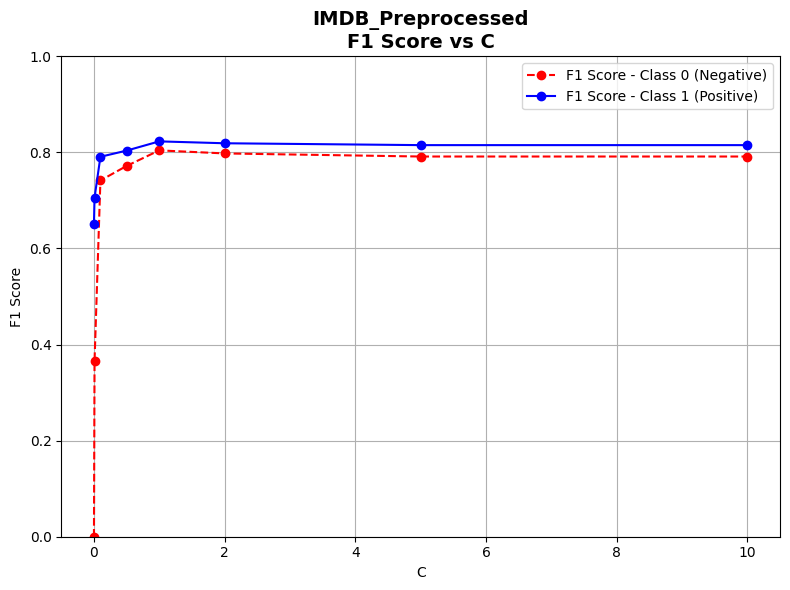


Best C = 1.0 with Avg F1 = 0.8136

=== Step 3: LinearSVC with BEST C ===


-- IMDB with best C = 0.5 --


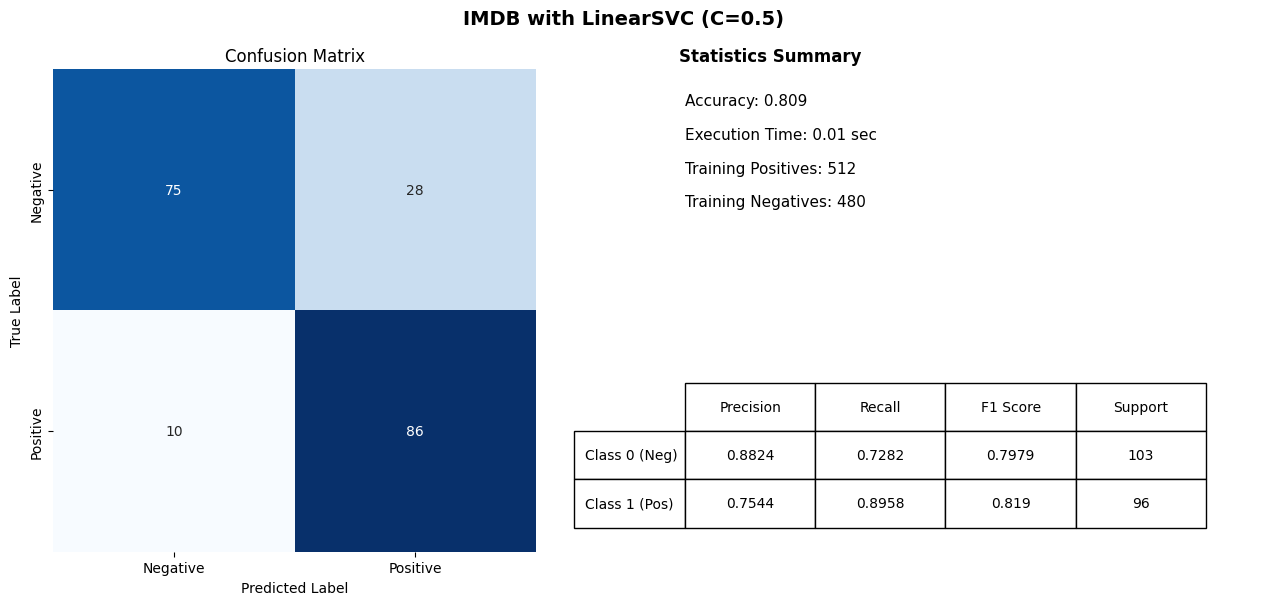


-- IMDB_Preprocessed with best C = 1.0 --


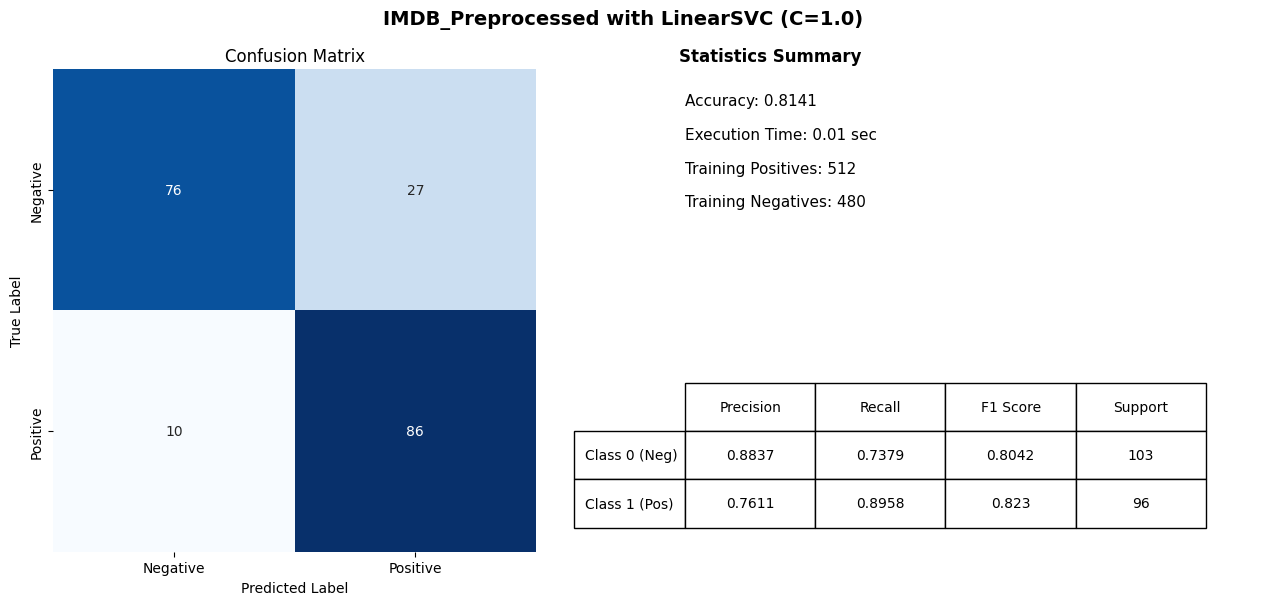

Results saved to 'LinearSVC_Results.csv'


In [17]:
from sklearn.svm import LinearSVC

param_values = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
best_params = {}
all_LinearSVC_results = []

# === Step 1: LinearSVC with default C
print("\n=== Step 1: LinearSVC with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LinearSVC,
        model_name="LinearSVC (default)",
        dataset_name=label
    )
    result["Model Group"] = "LinearSVC"
    all_LinearSVC_results.append(result)

# === Step 2: Hyperparameter tuning (C)
print("\n=== Step 2: Tuning C for LinearSVC ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_C = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LinearSVC,
        param_name="C",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_C

# === Step 3: Evaluate with best C
print("\n=== Step 3: LinearSVC with BEST C ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_C = best_params[label]
    print(f"\n-- {label} with best C = {best_C} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LinearSVC,
        model_name=f"LinearSVC (C={best_C})",
        dataset_name=label,
        model_params={"C": best_C}
    )
    result["Model Group"] = "LinearSVC"
    all_LinearSVC_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_LinearSVC_results)
results_df.to_csv("LinearSVC_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'LinearSVC_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **SVM (NuSVC)**


=== Step 1: NuSVC with DEFAULT parameters ===


-- Running default model on IMDB --


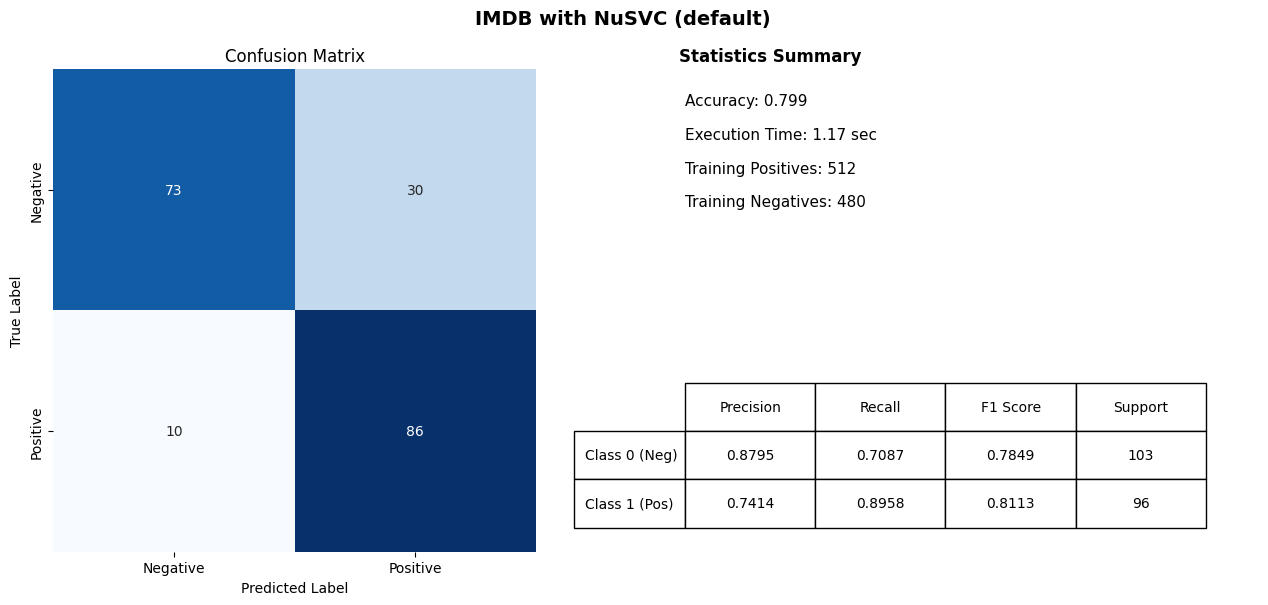


-- Running default model on IMDB_Preprocessed --


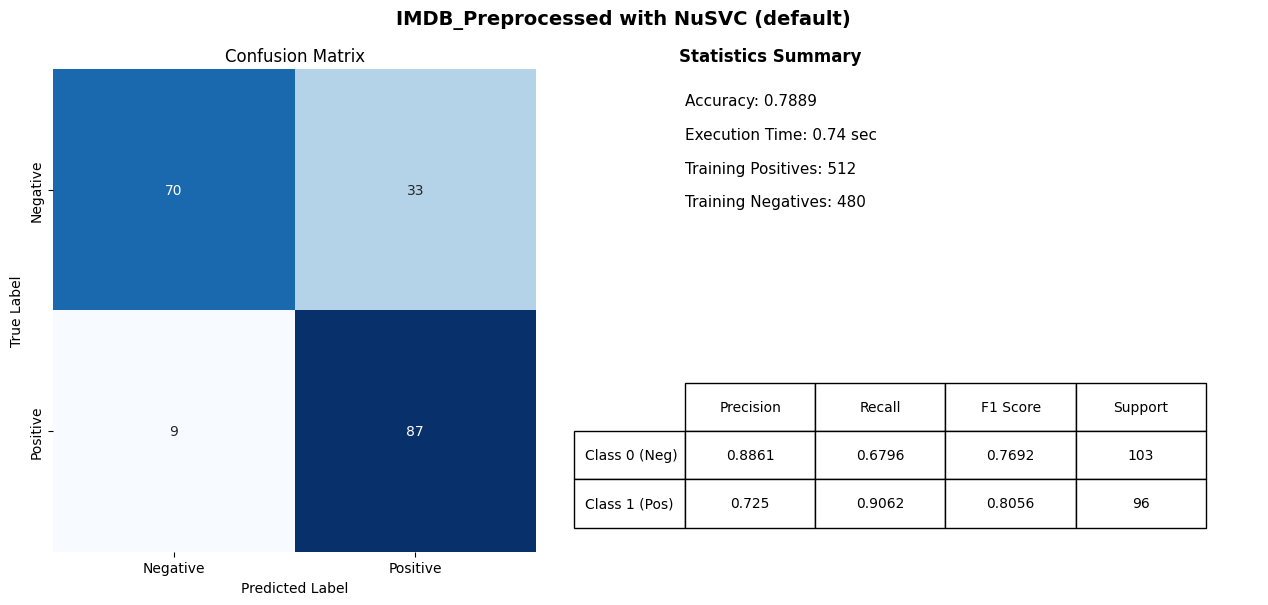


=== Step 2: Tuning nu for NuSVC ===


-- Tuning IMDB --



nu: 0.01 | F1[0]: 0.7957 | F1[1]: 0.8208 | Avg F1: 0.8082 | Time: 1.1881s
nu: 0.1 | F1[0]: 0.7979 | F1[1]: 0.819 | Avg F1: 0.8085 | Time: 1.5824s
nu: 0.3 | F1[0]: 0.7979 | F1[1]: 0.819 | Avg F1: 0.8085 | Time: 1.5851s
nu: 0.5 | F1[0]: 0.7849 | F1[1]: 0.8113 | Avg F1: 0.7981 | Time: 1.6924s
nu: 0.7 | F1[0]: 0.776 | F1[1]: 0.8093 | Avg F1: 0.7926 | Time: 1.2137s
nu: 0.9 | F1[0]: 0.7135 | F1[1]: 0.7841 | Avg F1: 0.7488 | Time: 1.1626s


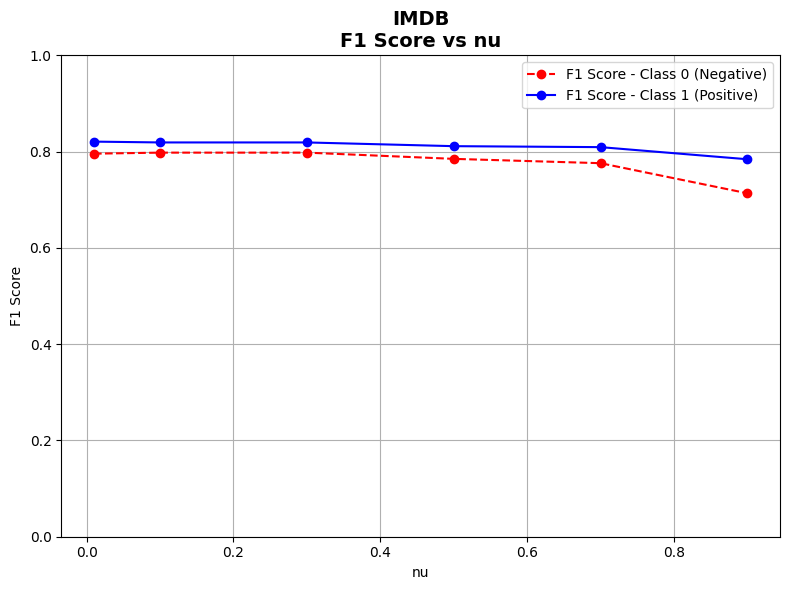


Best nu = 0.1 with Avg F1 = 0.8085

-- Tuning IMDB_Preprocessed --



nu: 0.01 | F1[0]: 0.7717 | F1[1]: 0.8037 | Avg F1: 0.7877 | Time: 0.7245s
nu: 0.1 | F1[0]: 0.7692 | F1[1]: 0.8056 | Avg F1: 0.7874 | Time: 0.7329s
nu: 0.3 | F1[0]: 0.7692 | F1[1]: 0.8056 | Avg F1: 0.7874 | Time: 0.7417s
nu: 0.5 | F1[0]: 0.7692 | F1[1]: 0.8056 | Avg F1: 0.7874 | Time: 0.7276s
nu: 0.7 | F1[0]: 0.7624 | F1[1]: 0.8018 | Avg F1: 0.7821 | Time: 0.7314s
nu: 0.9 | F1[0]: 0.6829 | F1[1]: 0.7778 | Avg F1: 0.7304 | Time: 0.7261s


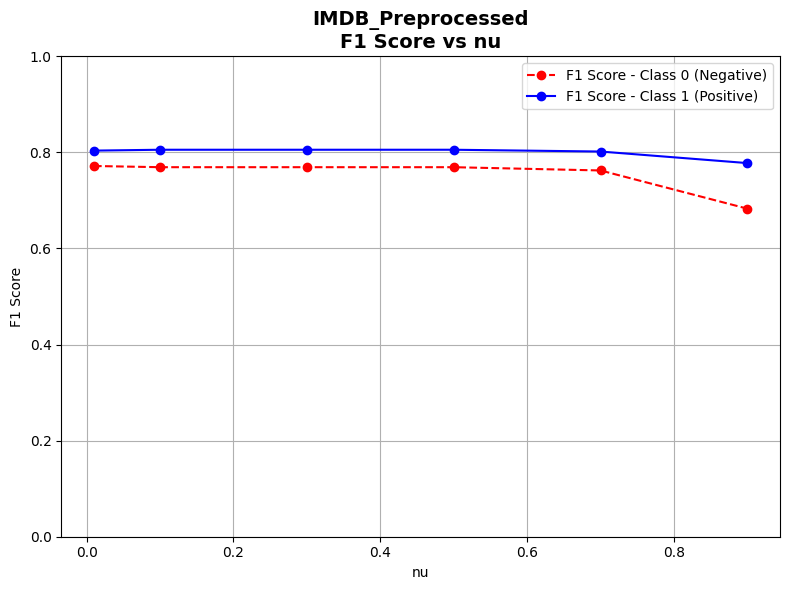


Best nu = 0.01 with Avg F1 = 0.7877

=== Step 3: NuSVC with BEST nu ===


-- IMDB with best nu = 0.1 --


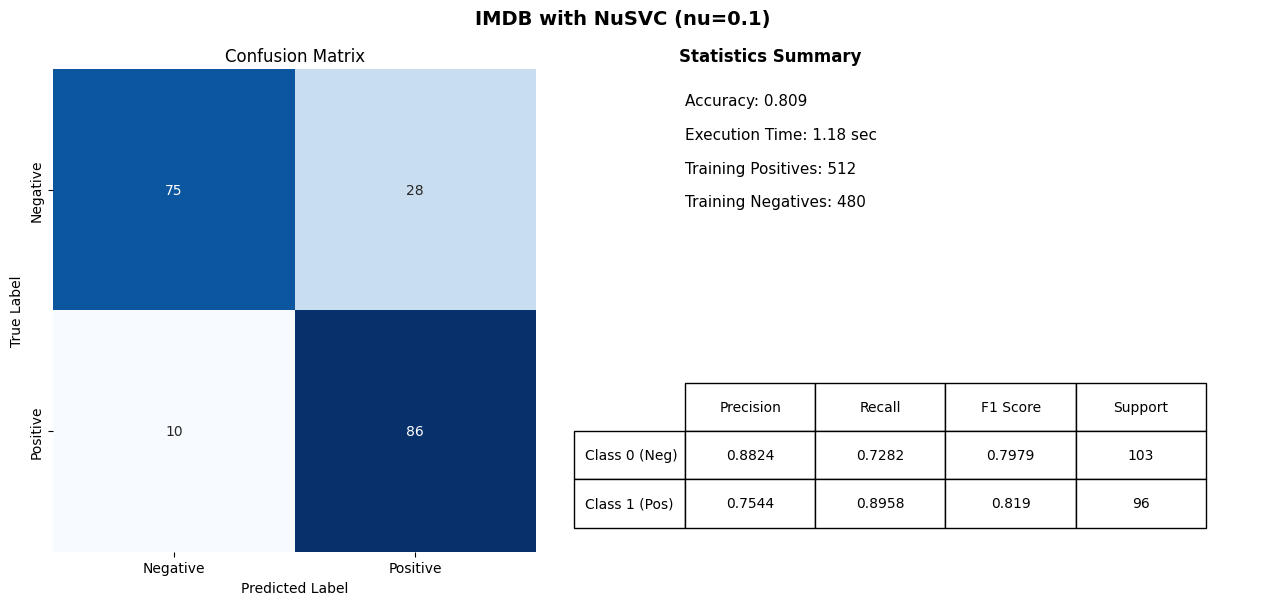


-- IMDB_Preprocessed with best nu = 0.01 --


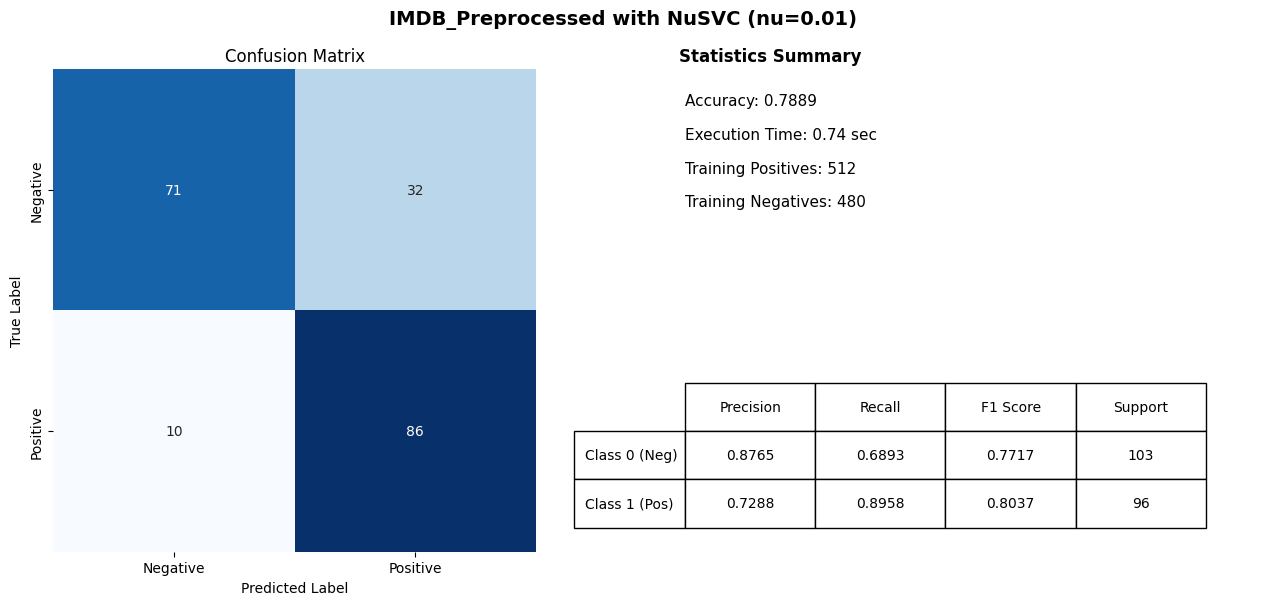

Results saved to 'NuSVC_Results.csv'


In [18]:
from sklearn.svm import NuSVC

param_values = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]
best_params = {}
all_NuSVC_results = []

# === Step 1: NuSVC with default Nu
print("\n=== Step 1: NuSVC with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=NuSVC,
        model_name="NuSVC (default)",
        dataset_name=label,
    )
    result["Model Group"] = "NuSVC"
    all_NuSVC_results.append(result)

# === Step 2: Hyperparameter tuning (nu)
print("\n=== Step 2: Tuning nu for NuSVC ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_nu = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=NuSVC,
        param_name="nu",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_nu

# === Step 3: Evaluate with best nu
print("\n=== Step 3: NuSVC with BEST nu ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_nu = best_params[label]
    print(f"\n-- {label} with best nu = {best_nu} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=NuSVC,
        model_name=f"NuSVC (nu={best_nu})",
        dataset_name=label,
        model_params={"nu": best_nu}
    )
    result["Model Group"] = "NuSVC"
    all_NuSVC_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_NuSVC_results)
results_df.to_csv("NuSVC_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'NuSVC_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **LogisticRegression**


=== Step 1: LogisticRegression with DEFAULT parameters ===


-- Running default model on IMDB --


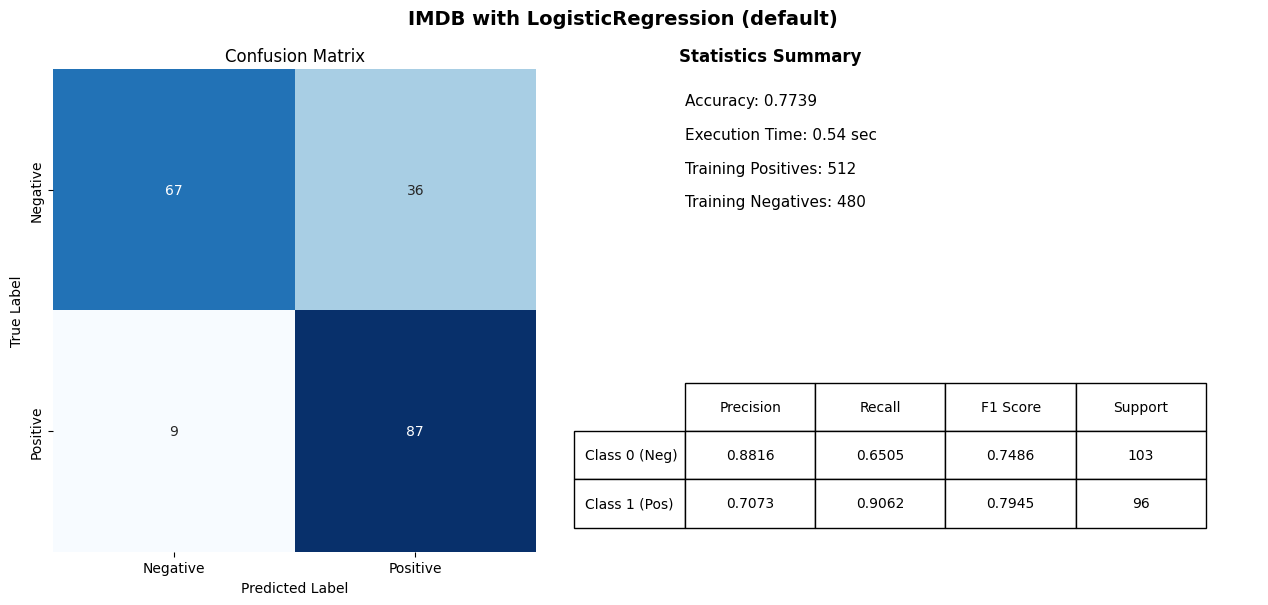


-- Running default model on IMDB_Preprocessed --


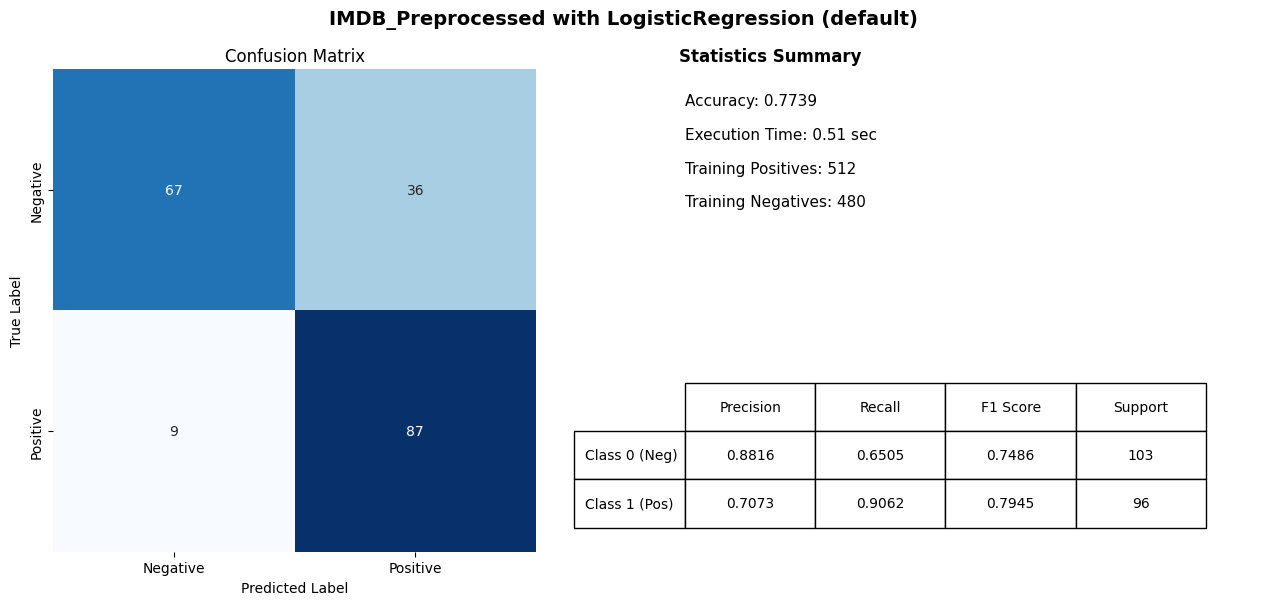


=== Step 2: Tuning C for LogisticRegression ===


-- Tuning IMDB --



C: 0.001 | F1[0]: 0.0 | F1[1]: 0.6508 | Avg F1: 0.3254 | Time: 0.1657s
C: 0.01 | F1[0]: 0.0 | F1[1]: 0.6508 | Avg F1: 0.3254 | Time: 0.088s
C: 0.1 | F1[0]: 0.4031 | F1[1]: 0.7138 | Avg F1: 0.5584 | Time: 0.0692s
C: 0.5 | F1[0]: 0.7059 | F1[1]: 0.7807 | Avg F1: 0.7433 | Time: 0.1055s
C: 1.0 | F1[0]: 0.7486 | F1[1]: 0.7945 | Avg F1: 0.7716 | Time: 0.2275s
C: 2.0 | F1[0]: 0.7802 | F1[1]: 0.8148 | Avg F1: 0.7975 | Time: 0.2577s
C: 5.0 | F1[0]: 0.8021 | F1[1]: 0.8246 | Avg F1: 0.8134 | Time: 0.4202s
C: 10.0 | F1[0]: 0.8 | F1[1]: 0.8173 | Avg F1: 0.8087 | Time: 0.299s


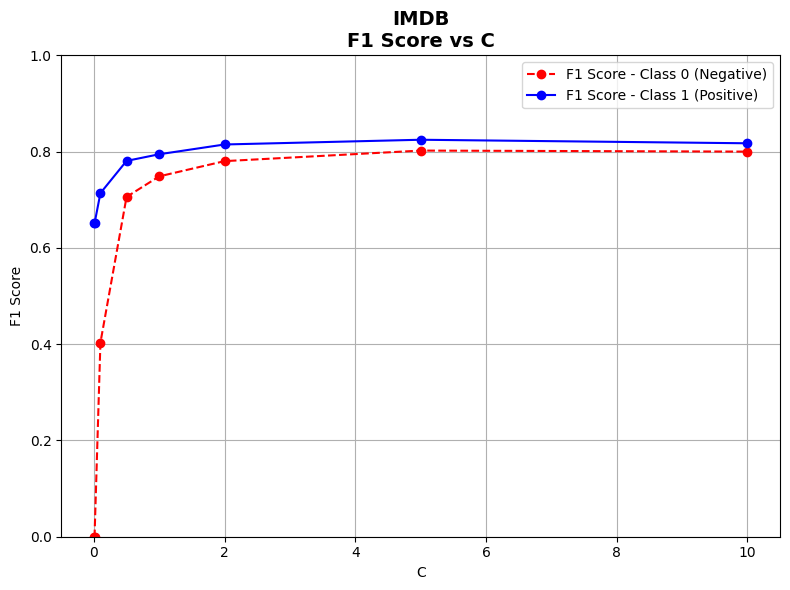


Best C = 5.0 with Avg F1 = 0.8134

-- Tuning IMDB_Preprocessed --



C: 0.001 | F1[0]: 0.0 | F1[1]: 0.6508 | Avg F1: 0.3254 | Time: 0.1644s
C: 0.01 | F1[0]: 0.0 | F1[1]: 0.6508 | Avg F1: 0.3254 | Time: 0.0816s
C: 0.1 | F1[0]: 0.4242 | F1[1]: 0.7143 | Avg F1: 0.5693 | Time: 0.1048s
C: 0.5 | F1[0]: 0.7059 | F1[1]: 0.7807 | Avg F1: 0.7433 | Time: 0.2363s
C: 1.0 | F1[0]: 0.7486 | F1[1]: 0.7945 | Avg F1: 0.7716 | Time: 0.1399s
C: 2.0 | F1[0]: 0.7624 | F1[1]: 0.8018 | Avg F1: 0.7821 | Time: 0.2443s
C: 5.0 | F1[0]: 0.7784 | F1[1]: 0.8075 | Avg F1: 0.7929 | Time: 0.1596s
C: 10.0 | F1[0]: 0.7914 | F1[1]: 0.8152 | Avg F1: 0.8033 | Time: 0.309s


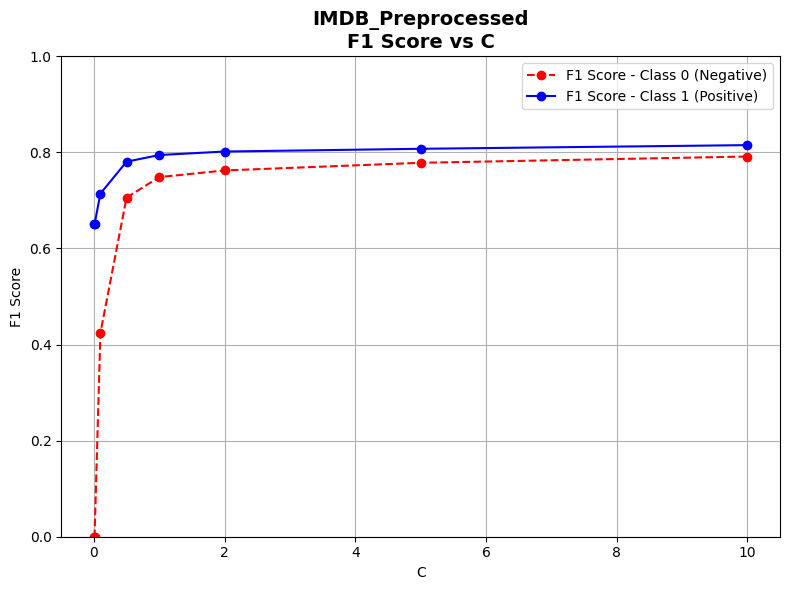


Best C = 10.0 with Avg F1 = 0.8033

=== Step 3: LogisticRegression with BEST C ===


-- IMDB with best C = 5.0 --


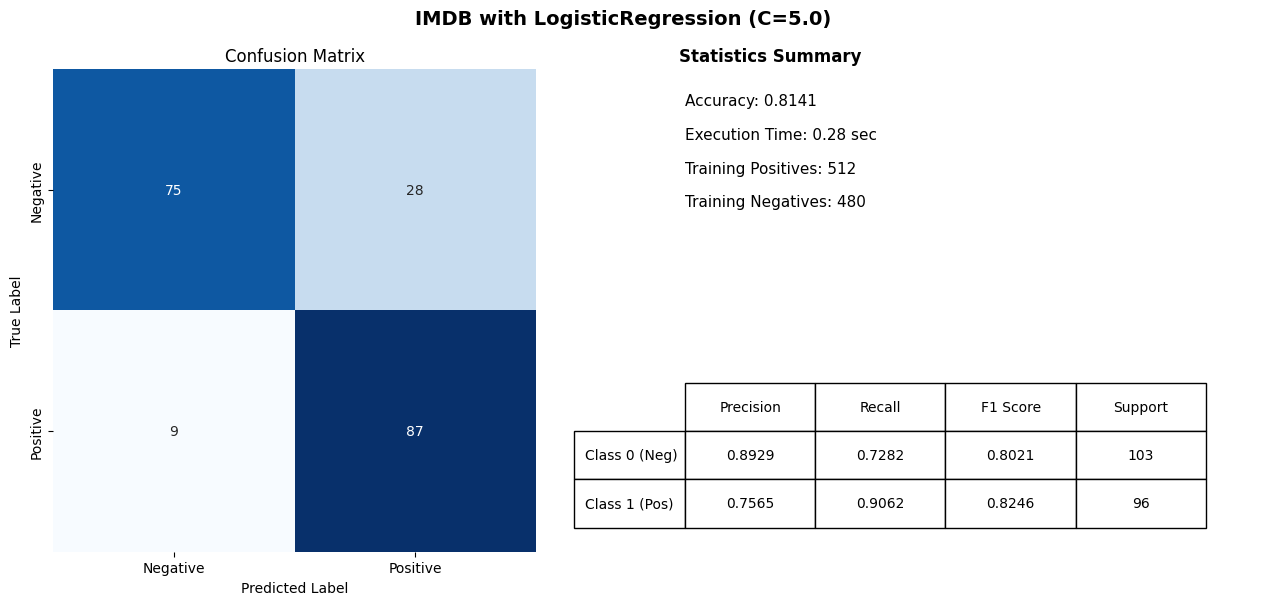


-- IMDB_Preprocessed with best C = 10.0 --


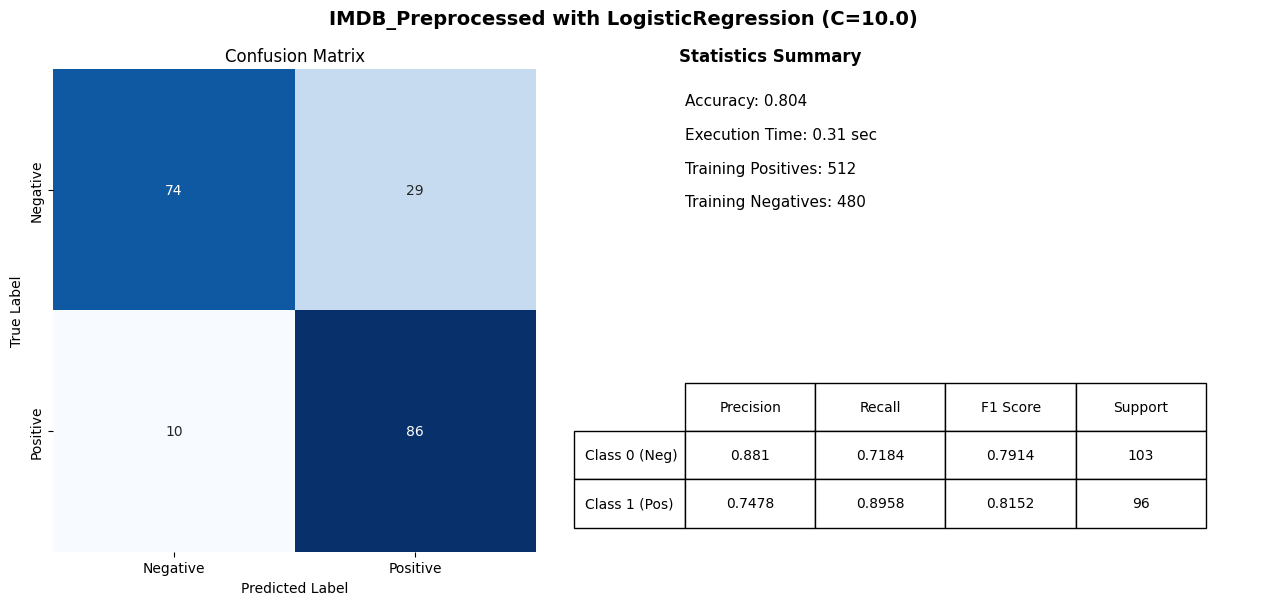

Results saved to 'LogisticRegression_Results.csv'


In [19]:
from sklearn.linear_model import LogisticRegression

param_values = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
best_params = {}
all_LR_results = []

# === Step 1: Logistic Regression with default C
print("\n=== Step 1: LogisticRegression with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LogisticRegression,
        model_name="LogisticRegression (default)",
        dataset_name=label,
        model_params={"max_iter": 1000}
    )
    result["Model Group"] = "LogisticRegression"
    all_LR_results.append(result)

# === Step 2: Hyperparameter tuning (C)
print("\n=== Step 2: Tuning C for LogisticRegression ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_C = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LogisticRegression,
        param_name="C",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_C

# === Step 3: Evaluate with best C
print("\n=== Step 3: LogisticRegression with BEST C ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_C = best_params[label]
    print(f"\n-- {label} with best C = {best_C} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=LogisticRegression,
        model_name=f"LogisticRegression (C={best_C})",
        dataset_name=label,
        model_params={"C": best_C, "max_iter": 1000}
    )
    result["Model Group"] = "LogisticRegression"
    all_LR_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_LR_results)
results_df.to_csv("LogisticRegression_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'LogisticRegression_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)



## **RandomForest**


=== Step 1: RandomForestClassifier with DEFAULT parameters ===


-- Running default model on IMDB --


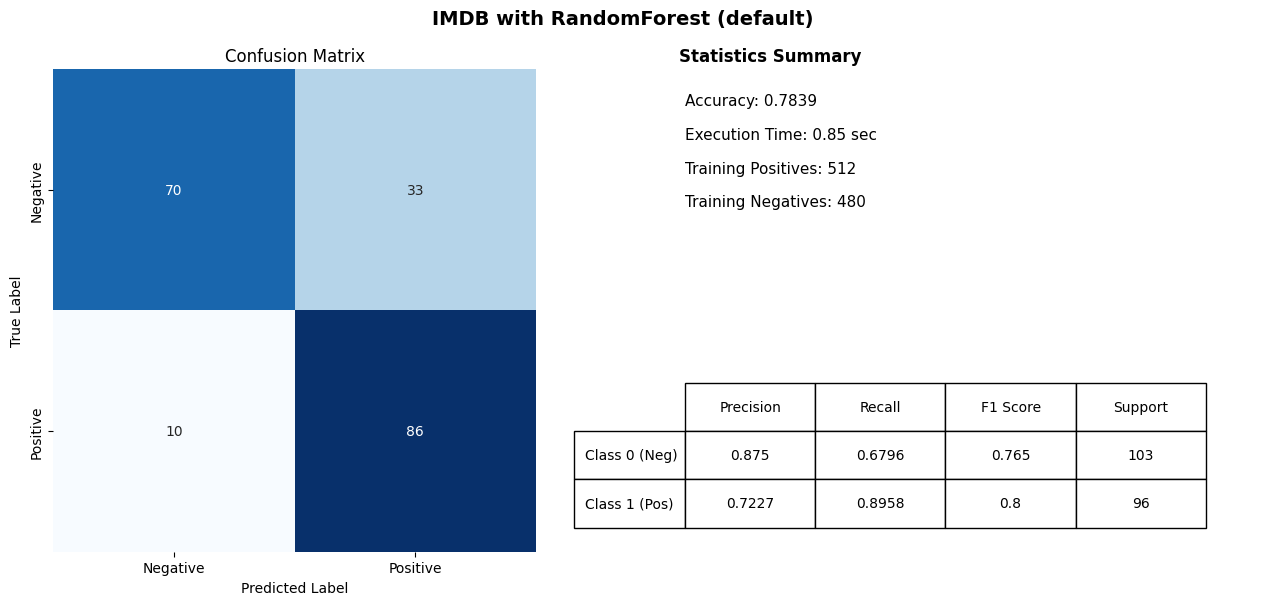


-- Running default model on IMDB_Preprocessed --


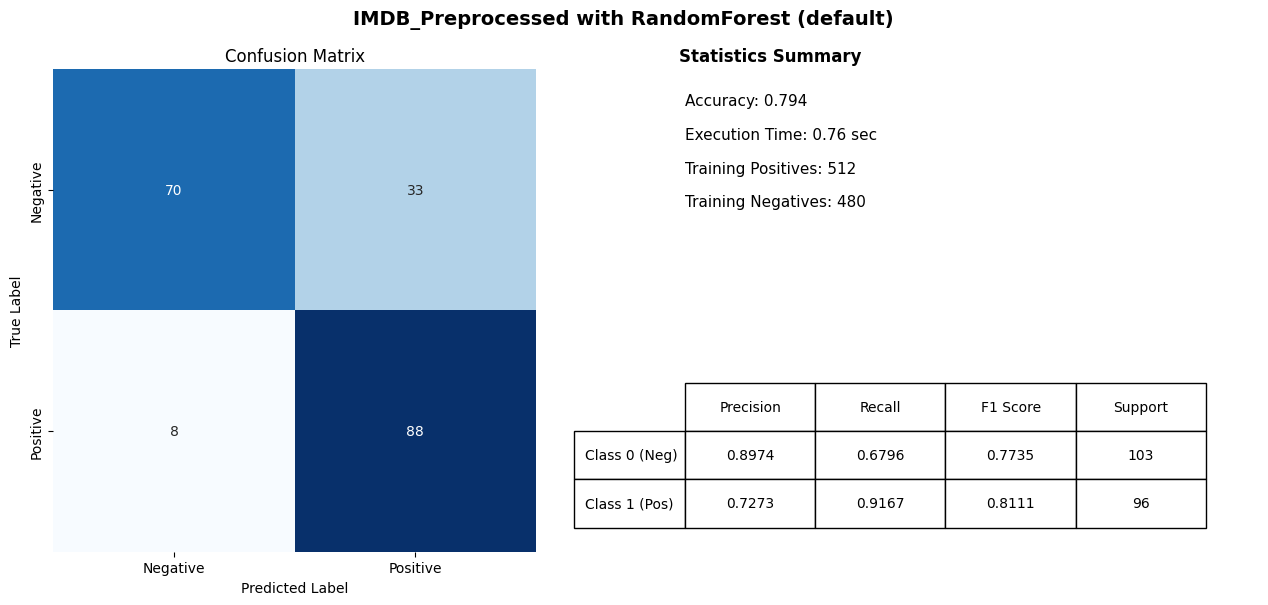


=== Step 2: Tuning n_estimators for RandomForest ===


-- Tuning IMDB --



n_estimators: 10 | F1[0]: 0.6756 | F1[1]: 0.578 | Avg F1: 0.6268 | Time: 0.0905s
n_estimators: 50 | F1[0]: 0.7487 | F1[1]: 0.7773 | Avg F1: 0.763 | Time: 0.4219s
n_estimators: 100 | F1[0]: 0.7556 | F1[1]: 0.7982 | Avg F1: 0.7769 | Time: 0.8413s
n_estimators: 200 | F1[0]: 0.7692 | F1[1]: 0.8056 | Avg F1: 0.7874 | Time: 1.8158s
n_estimators: 300 | F1[0]: 0.7624 | F1[1]: 0.8018 | Avg F1: 0.7821 | Time: 3.0669s
n_estimators: 500 | F1[0]: 0.7667 | F1[1]: 0.8073 | Avg F1: 0.787 | Time: 4.778s


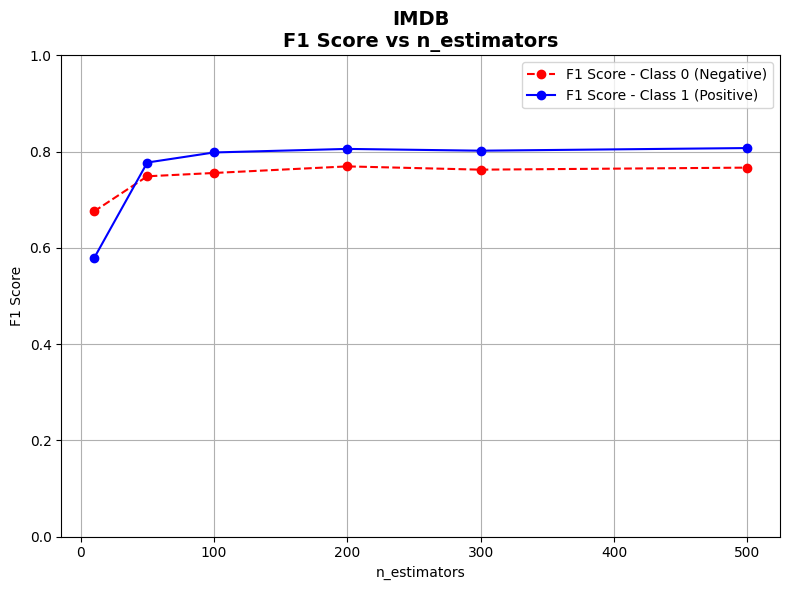


Best n_estimators = 200 with Avg F1 = 0.7874

-- Tuning IMDB_Preprocessed --



n_estimators: 10 | F1[0]: 0.7189 | F1[1]: 0.663 | Avg F1: 0.6909 | Time: 0.1009s
n_estimators: 50 | F1[0]: 0.8163 | F1[1]: 0.8218 | Avg F1: 0.8191 | Time: 0.4299s
n_estimators: 100 | F1[0]: 0.7914 | F1[1]: 0.8152 | Avg F1: 0.8033 | Time: 0.8676s
n_estimators: 200 | F1[0]: 0.8085 | F1[1]: 0.8286 | Avg F1: 0.8185 | Time: 2.1609s
n_estimators: 300 | F1[0]: 0.7978 | F1[1]: 0.8279 | Avg F1: 0.8129 | Time: 2.5102s
n_estimators: 500 | F1[0]: 0.7978 | F1[1]: 0.8279 | Avg F1: 0.8129 | Time: 4.5989s


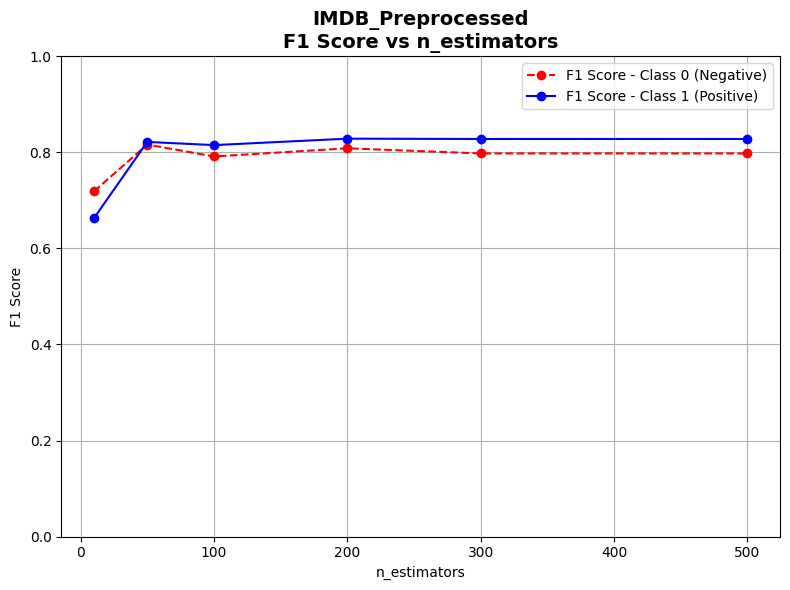


Best n_estimators = 50 with Avg F1 = 0.8191

=== Step 3: RandomForestClassifier with BEST n_estimators ===


-- IMDB with best n_estimators = 200 --


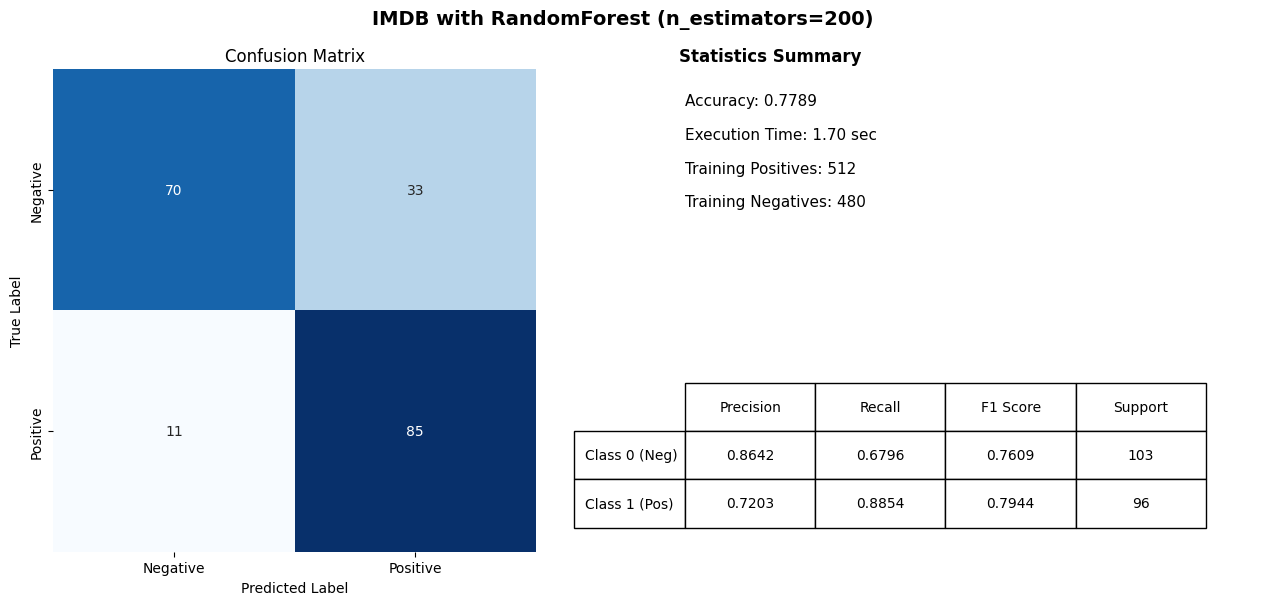


-- IMDB_Preprocessed with best n_estimators = 50 --


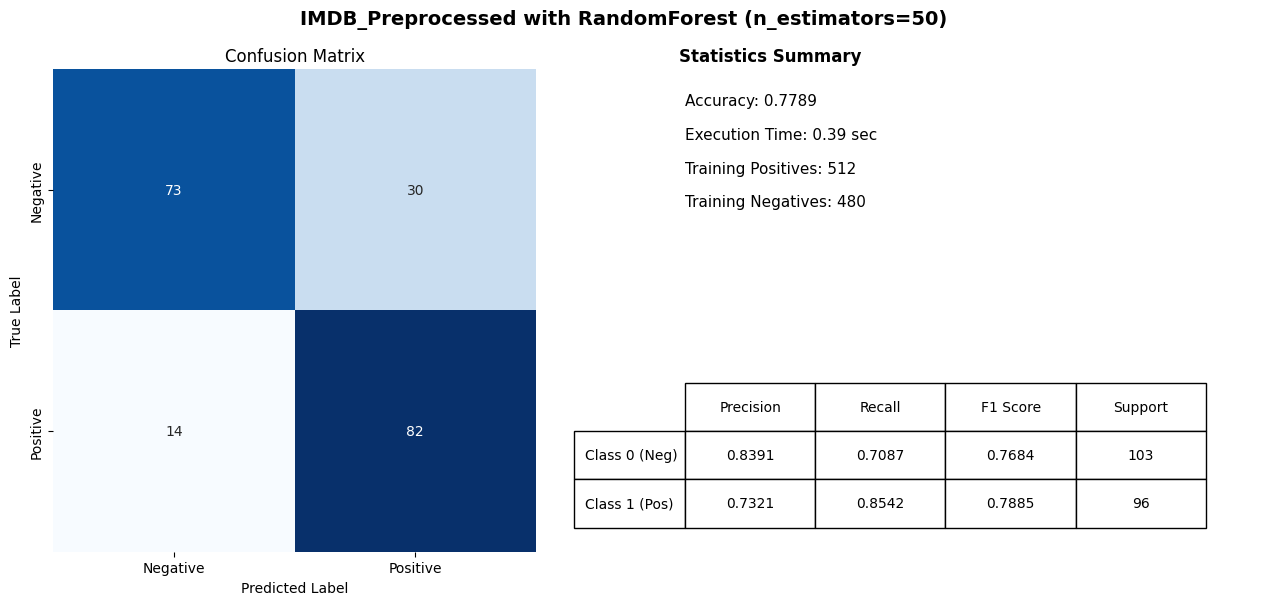

Results saved to 'RandomForest_Results.csv'


In [20]:
from sklearn.ensemble import RandomForestClassifier

param_values = [10, 50, 100, 200, 300, 500]
best_params = {}
all_RF_results = []

# === Step 1: RandomForest with default n_estimators
print("\n=== Step 1: RandomForestClassifier with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=RandomForestClassifier,
        model_name="RandomForest (default)",
        dataset_name=label
    )
    result["Model Group"] = "RandomForest"
    all_RF_results.append(result)

# === Step 2: Hyperparameter tuning (n_estimators)
print("\n=== Step 2: Tuning n_estimators for RandomForest ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_n = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=RandomForestClassifier,
        param_name="n_estimators",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_n

# === Step 3: Evaluation with best n_estimators
print("\n=== Step 3: RandomForestClassifier with BEST n_estimators ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_n = best_params[label]
    print(f"\n-- {label} with best n_estimators = {best_n} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=RandomForestClassifier,
        model_name=f"RandomForest (n_estimators={best_n})",
        dataset_name=label,
        model_params={"n_estimators": best_n}
    )
    result["Model Group"] = "RandomForest"
    all_RF_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_RF_results)
results_df.to_csv("RandomForest_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'RandomForest_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **KNeighborsClassifier**


=== Step 1: KNeighborsClassifier with DEFAULT parameters ===


-- Running default model on IMDB --


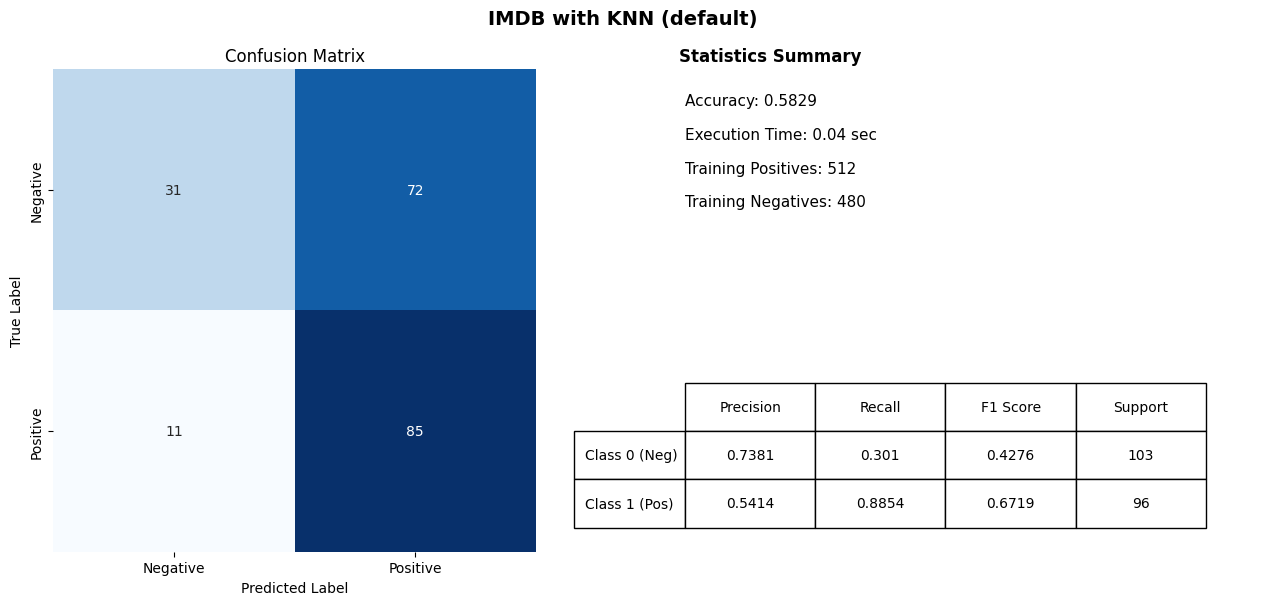


-- Running default model on IMDB_Preprocessed --


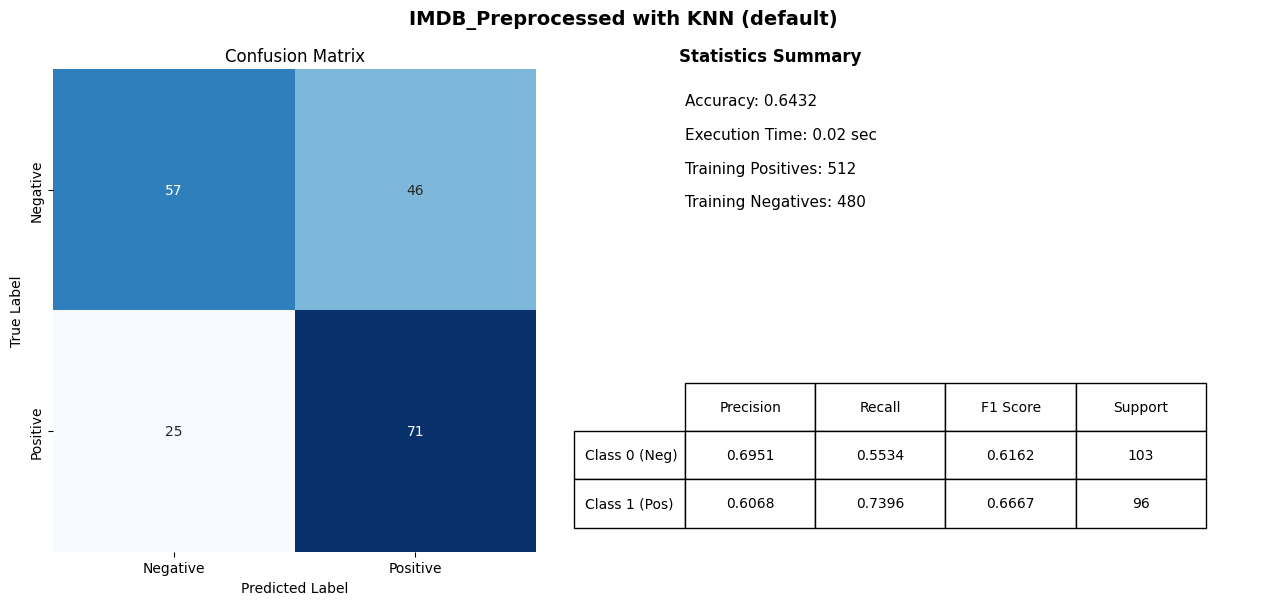


=== Step 2: Tuning n_neighbors for KNN ===


-- Tuning IMDB --



n_neighbors: 1 | F1[0]: 0.5 | F1[1]: 0.6195 | Avg F1: 0.5597 | Time: 0.03s
n_neighbors: 3 | F1[0]: 0.4832 | F1[1]: 0.6908 | Avg F1: 0.587 | Time: 0.0226s
n_neighbors: 5 | F1[0]: 0.4276 | F1[1]: 0.6719 | Avg F1: 0.5498 | Time: 0.0221s
n_neighbors: 7 | F1[0]: 0.3972 | F1[1]: 0.6693 | Avg F1: 0.5332 | Time: 0.0217s
n_neighbors: 9 | F1[0]: 0.4029 | F1[1]: 0.6795 | Avg F1: 0.5412 | Time: 0.0222s
n_neighbors: 11 | F1[0]: 0.3333 | F1[1]: 0.6692 | Avg F1: 0.5013 | Time: 0.0219s
n_neighbors: 15 | F1[0]: 0.3206 | F1[1]: 0.6667 | Avg F1: 0.4936 | Time: 0.0218s
n_neighbors: 17 | F1[0]: 0.2835 | F1[1]: 0.6642 | Avg F1: 0.4738 | Time: 0.0219s
n_neighbors: 19 | F1[0]: 0.3231 | F1[1]: 0.6716 | Avg F1: 0.4974 | Time: 0.0257s


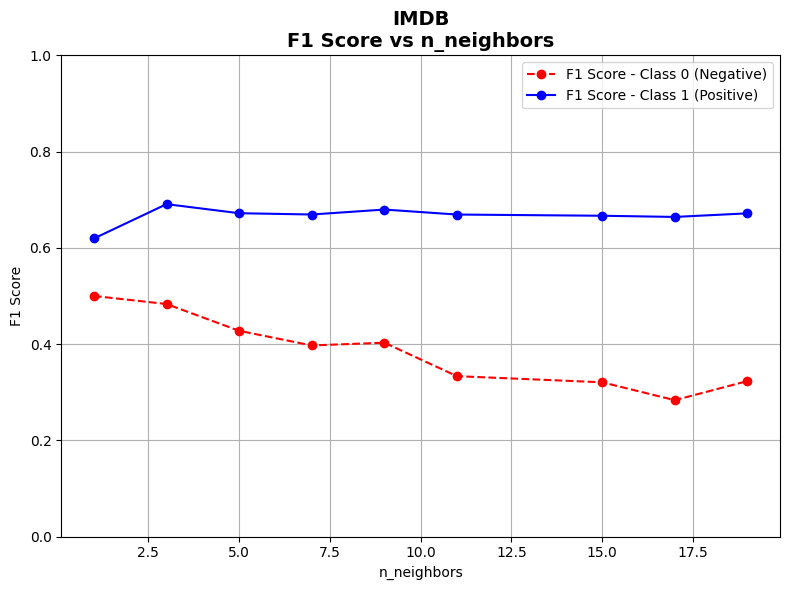


Best n_neighbors = 3 with Avg F1 = 0.587

-- Tuning IMDB_Preprocessed --



n_neighbors: 1 | F1[0]: 0.5957 | F1[1]: 0.6381 | Avg F1: 0.6169 | Time: 0.0187s
n_neighbors: 3 | F1[0]: 0.6878 | F1[1]: 0.7177 | Avg F1: 0.7028 | Time: 0.0159s
n_neighbors: 5 | F1[0]: 0.6162 | F1[1]: 0.6667 | Avg F1: 0.6414 | Time: 0.0135s
n_neighbors: 7 | F1[0]: 0.6378 | F1[1]: 0.6854 | Avg F1: 0.6616 | Time: 0.0127s
n_neighbors: 9 | F1[0]: 0.6631 | F1[1]: 0.7014 | Avg F1: 0.6823 | Time: 0.0129s
n_neighbors: 11 | F1[0]: 0.6486 | F1[1]: 0.6948 | Avg F1: 0.6717 | Time: 0.0131s
n_neighbors: 15 | F1[0]: 0.663 | F1[1]: 0.7189 | Avg F1: 0.6909 | Time: 0.0183s
n_neighbors: 17 | F1[0]: 0.663 | F1[1]: 0.7103 | Avg F1: 0.6867 | Time: 0.0177s
n_neighbors: 19 | F1[0]: 0.6703 | F1[1]: 0.7222 | Avg F1: 0.6963 | Time: 0.0133s


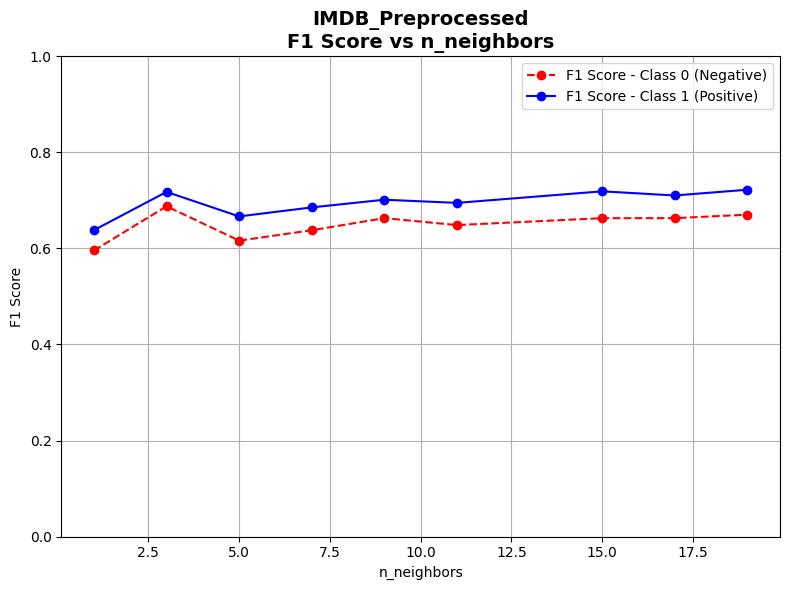


Best n_neighbors = 3 with Avg F1 = 0.7028

=== Step 3: KNN with BEST n_neighbors ===


-- IMDB with best k = 3 --


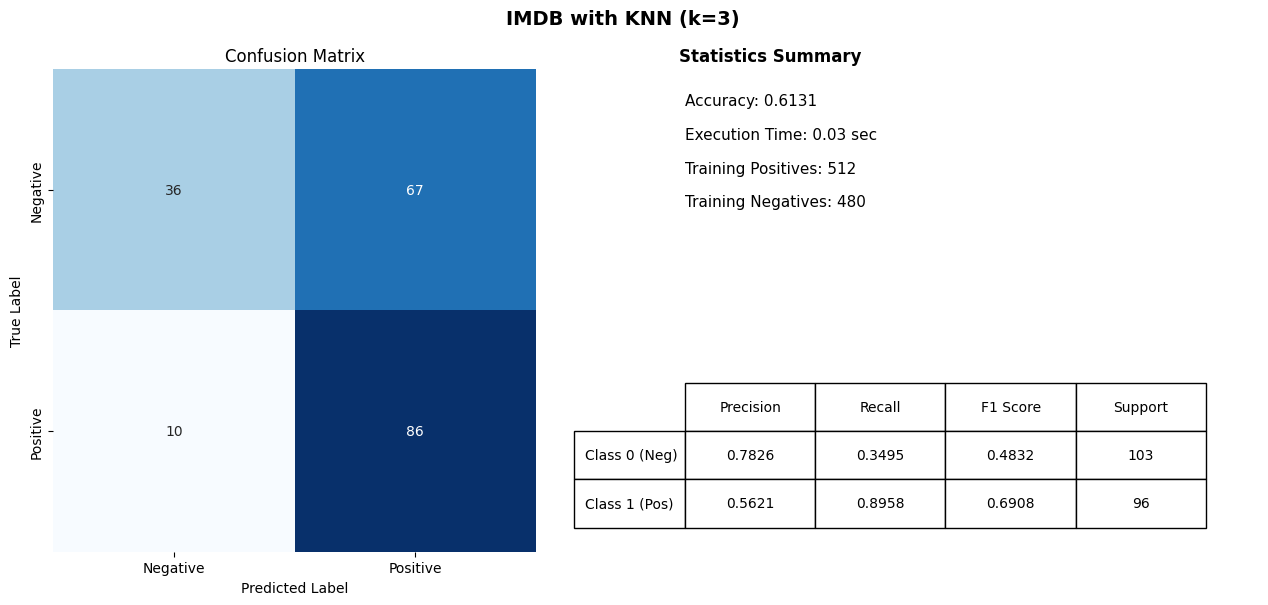


-- IMDB_Preprocessed with best k = 3 --


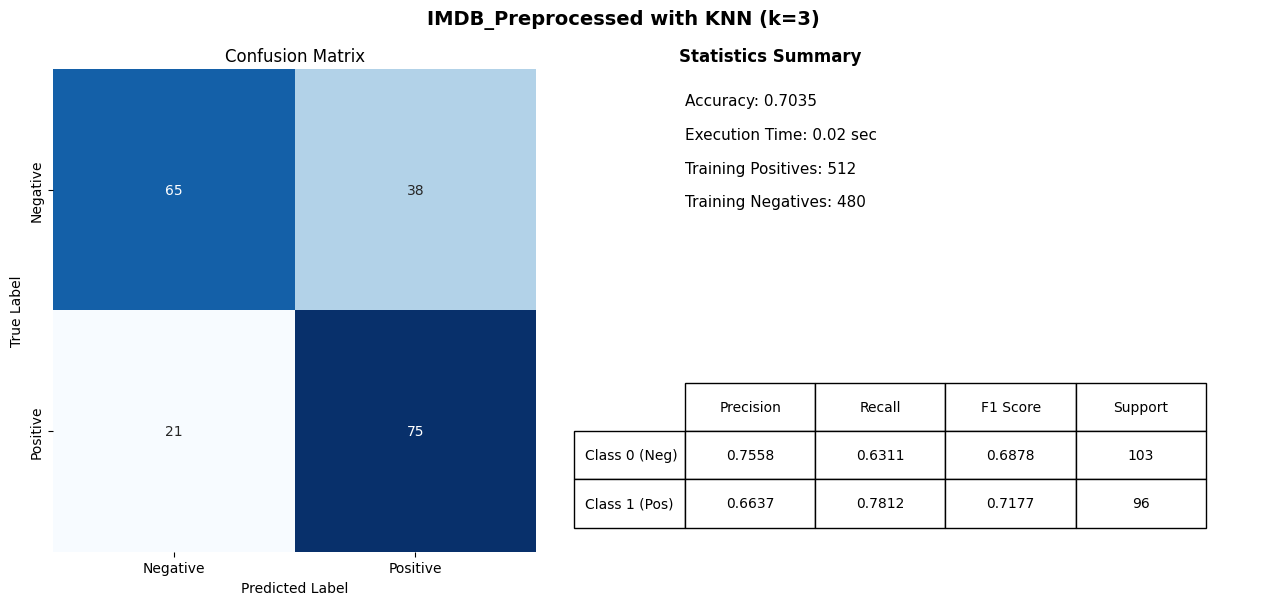

Results saved to 'KNN_Results.csv'


In [21]:
from sklearn.neighbors import KNeighborsClassifier

param_values = [1, 3, 5, 7, 9, 11, 15, 17, 19]
best_params = {}
all_KNN_results = []

# === Step 1: KNN with default n_neighbors
print("\n=== Step 1: KNeighborsClassifier with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=KNeighborsClassifier,
        model_name="KNN (default)",
        dataset_name=label
    )
    result["Model Group"] = "KNN"
    all_KNN_results.append(result)

# === Step 2: Tuning n_neighbors
print("\n=== Step 2: Tuning n_neighbors for KNN ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_k = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=KNeighborsClassifier,
        param_name="n_neighbors",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_k

# === Step 3: Evaluation with best k
print("\n=== Step 3: KNN with BEST n_neighbors ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_k = best_params[label]
    print(f"\n-- {label} with best k = {best_k} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=KNeighborsClassifier,
        model_name=f"KNN (k={best_k})",
        dataset_name=label,
        model_params={"n_neighbors": best_k}
    )
    result["Model Group"] = "KNN"
    all_KNN_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_KNN_results)
results_df.to_csv("KNN_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'KNN_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)


## **AdaBoostClassifier**


=== Step 1: AdaBoostClassifier with DEFAULT parameters ===


-- Running default model on IMDB --


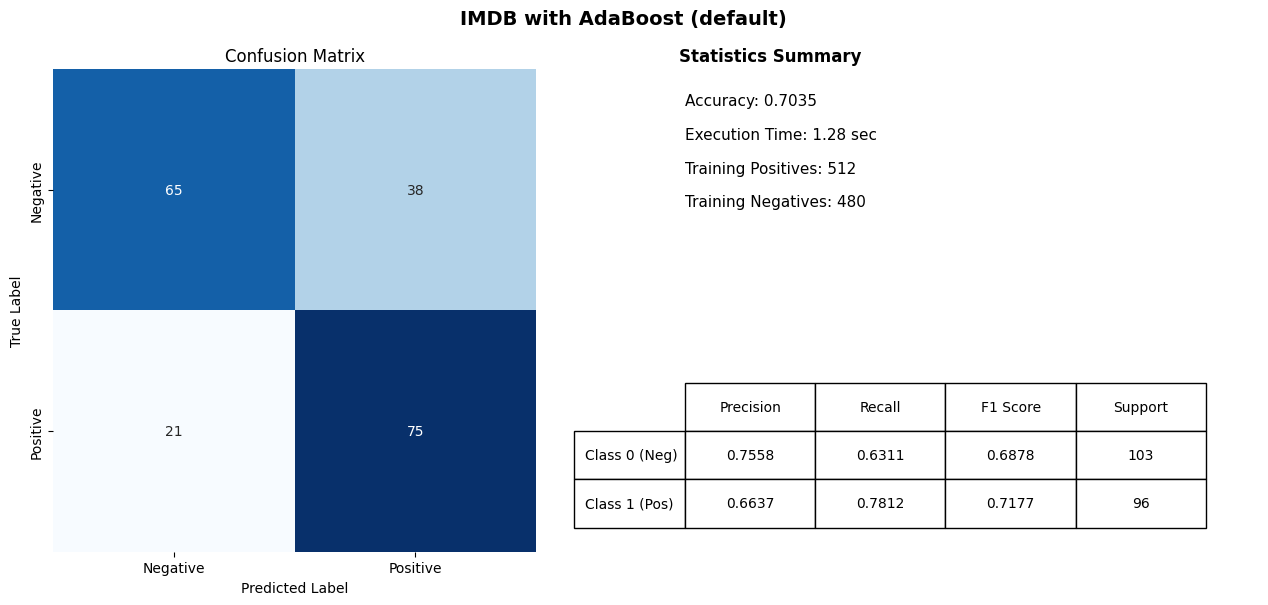


-- Running default model on IMDB_Preprocessed --


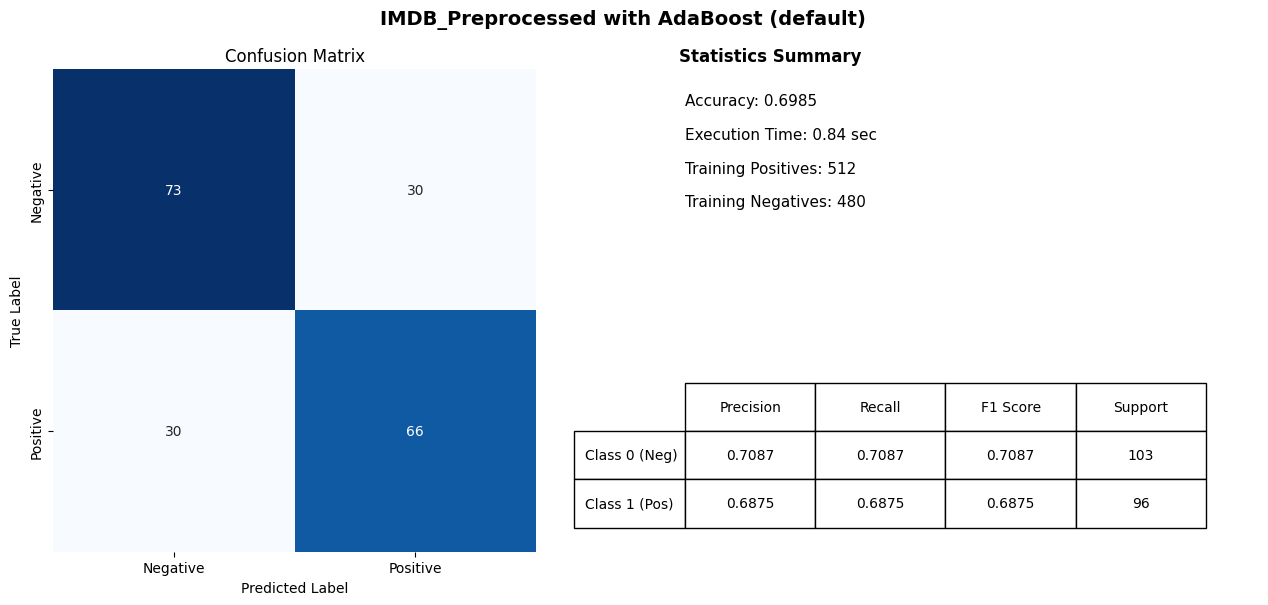


=== Step 2: Tuning n_estimators for AdaBoost ===


-- Tuning IMDB --



n_estimators: 10 | F1[0]: 0.6178 | F1[1]: 0.6473 | Avg F1: 0.6326 | Time: 0.2594s
n_estimators: 50 | F1[0]: 0.6878 | F1[1]: 0.7177 | Avg F1: 0.7028 | Time: 1.6221s
n_estimators: 100 | F1[0]: 0.7351 | F1[1]: 0.77 | Avg F1: 0.7525 | Time: 2.9237s
n_estimators: 200 | F1[0]: 0.7374 | F1[1]: 0.74 | Avg F1: 0.7387 | Time: 5.052s
n_estimators: 300 | F1[0]: 0.7282 | F1[1]: 0.7389 | Avg F1: 0.7336 | Time: 8.308s
n_estimators: 500 | F1[0]: 0.7407 | F1[1]: 0.7656 | Avg F1: 0.7531 | Time: 13.3691s


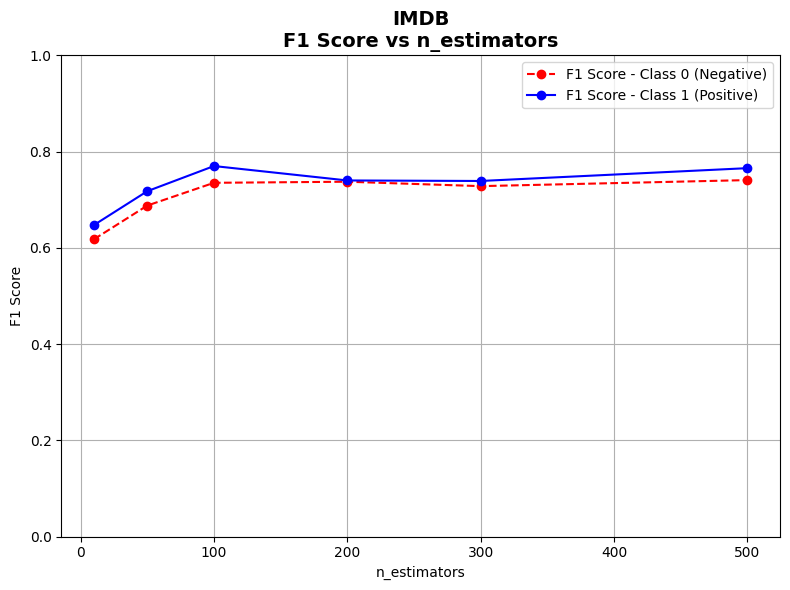


Best n_estimators = 500 with Avg F1 = 0.7531

-- Tuning IMDB_Preprocessed --



n_estimators: 10 | F1[0]: 0.6013 | F1[1]: 0.751 | Avg F1: 0.6762 | Time: 0.1744s
n_estimators: 50 | F1[0]: 0.7087 | F1[1]: 0.6875 | Avg F1: 0.6981 | Time: 0.822s
n_estimators: 100 | F1[0]: 0.7072 | F1[1]: 0.7558 | Avg F1: 0.7315 | Time: 1.6598s
n_estimators: 200 | F1[0]: 0.7072 | F1[1]: 0.7558 | Avg F1: 0.7315 | Time: 3.293s
n_estimators: 300 | F1[0]: 0.7174 | F1[1]: 0.757 | Avg F1: 0.7372 | Time: 5.6786s
n_estimators: 500 | F1[0]: 0.7273 | F1[1]: 0.7583 | Avg F1: 0.7428 | Time: 8.3676s


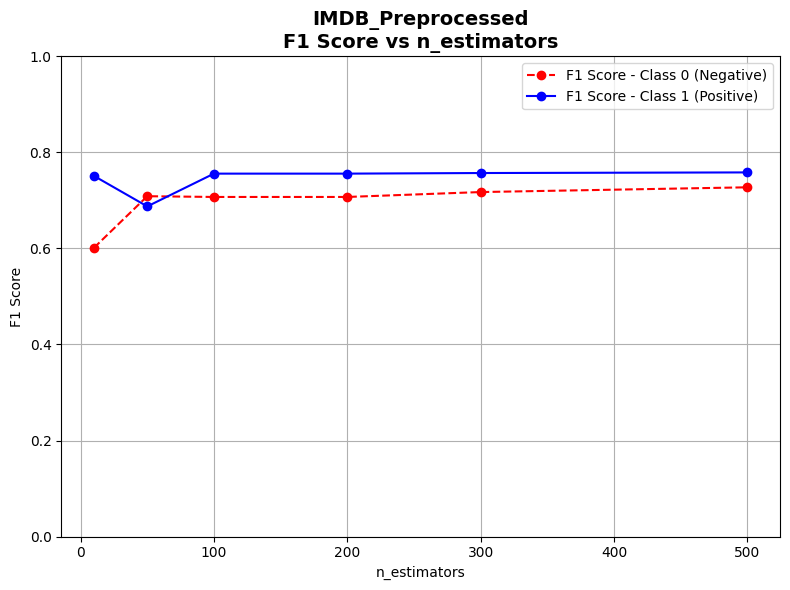


Best n_estimators = 500 with Avg F1 = 0.7428

=== Step 3: AdaBoostClassifier with BEST n_estimators ===


-- IMDB with best n_estimators = 500 --


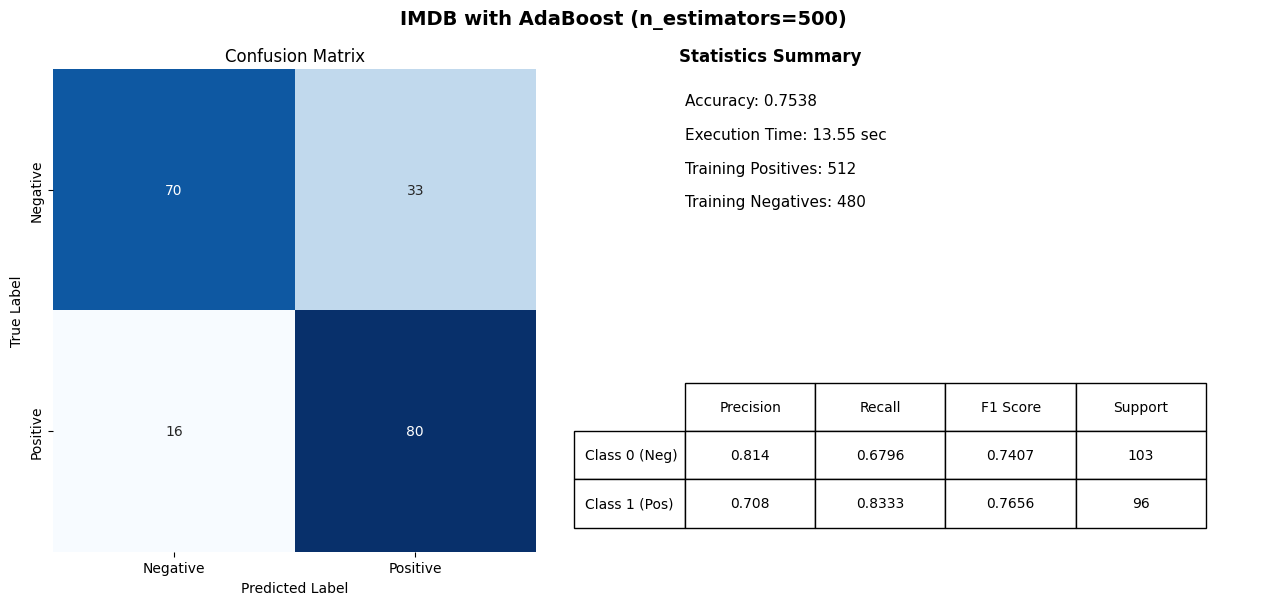


-- IMDB_Preprocessed with best n_estimators = 500 --


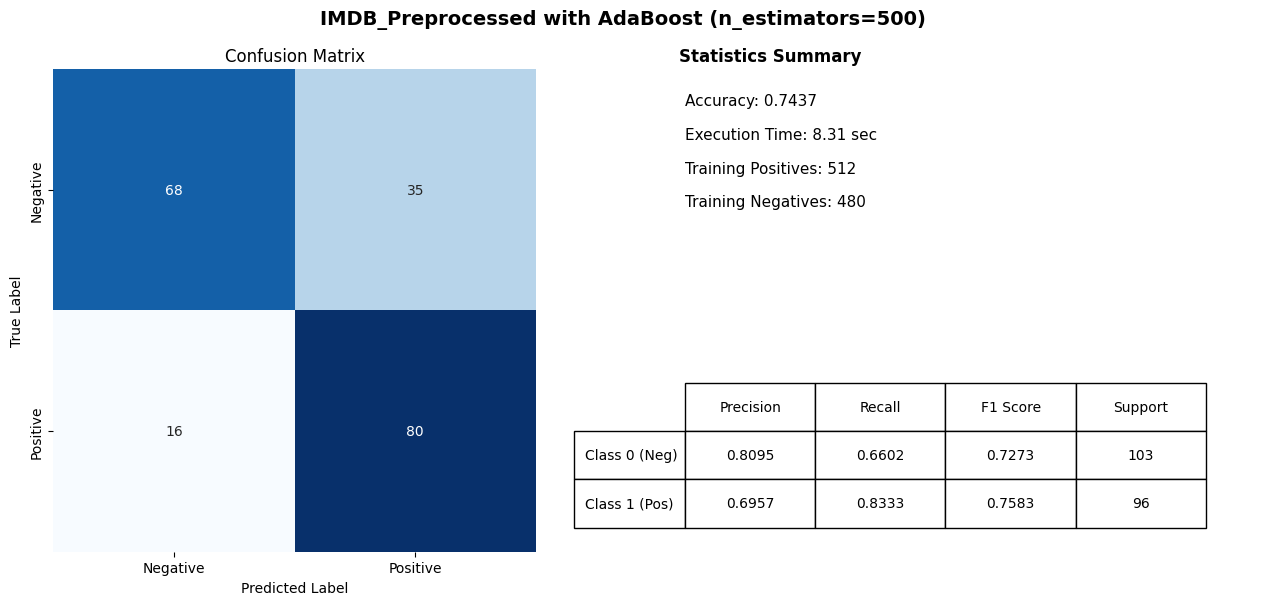

Results saved to 'AdaBoost_Results.csv'


In [22]:
from sklearn.ensemble import AdaBoostClassifier

param_values = [10, 50, 100, 200, 300, 500]
best_params = {}
all_ADA_results = []

# === Step 1: AdaBoost with default n_estimators
print("\n=== Step 1: AdaBoostClassifier with DEFAULT parameters ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Running default model on {label} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=AdaBoostClassifier,
        model_name="AdaBoost (default)",
        dataset_name=label
    )
    result["Model Group"] = "AdaBoost"
    all_ADA_results.append(result)

# === Step 2: Hyperparameter tuning (n_estimators)
print("\n=== Step 2: Tuning n_estimators for AdaBoost ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    print(f"\n-- Tuning {label} --")
    best_n = test_model_with_param_from_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=AdaBoostClassifier,
        param_name="n_estimators",
        param_values=param_values,
        dataset_label=label
    )
    best_params[label] = best_n

# === Step 3: Evaluate with best n_estimators
print("\n=== Step 3: AdaBoostClassifier with BEST n_estimators ===\n")
for label, (X_train, X_test, y_train, y_test, df) in datasets.items():
    best_n = best_params[label]
    print(f"\n-- {label} with best n_estimators = {best_n} --")
    result = run_model_on_vectorized_data(
        X_train_tfidf=X_train,
        X_test_tfidf=X_test,
        y_train=y_train,
        y_test=y_test,
        df=df,
        model_class=AdaBoostClassifier,
        model_name=f"AdaBoost (n_estimators={best_n})",
        dataset_name=label,
        model_params={"n_estimators": best_n}
    )
    result["Model Group"] = "AdaBoost"
    all_ADA_results.append(result)

# === Save and append
results_df = pd.DataFrame(all_ADA_results)
results_df.to_csv("AdaBoost_Results.csv", index=False, encoding="utf-8-sig")
print("Results saved to 'AdaBoost_Results.csv'")
all_Algo_results = pd.concat([all_Algo_results, results_df], ignore_index=True)

# **Save All**

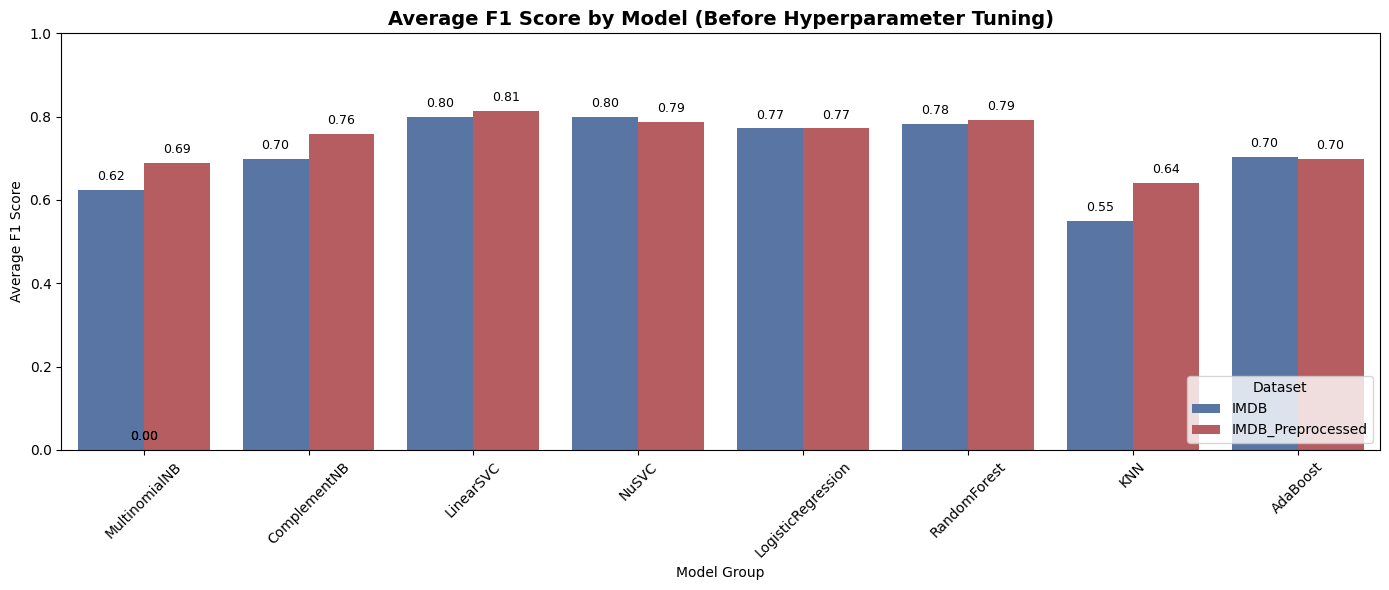

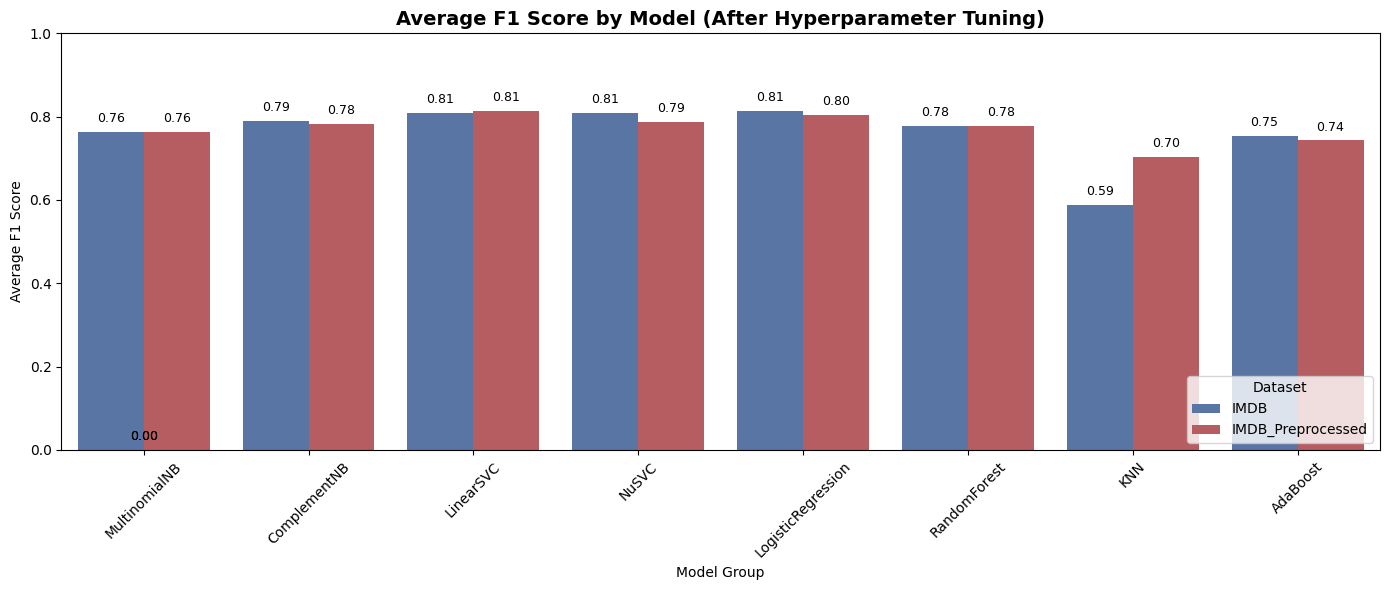

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_Algo_results.to_csv("All_Algorithms_Results.csv", index=False, encoding="utf-8-sig")

# Load the global results
df = pd.read_csv("All_Algorithms_Results.csv")

# Calculate Avg F1 score
df["Avg_F1"] = (df["F1_0"] + df["F1_1"]) / 2

# Split into before and after tuning
before_opt = df[df["Algorithm"].str.contains("default")]
after_opt = df[~df["Algorithm"].str.contains("default")]

# Define dataset order and color palette
dataset_order = ["IMDB", "IMDB_Preprocessed"]
dataset_palette = {
    "IMDB": "#4c72b0",
    "IMDB_Preprocessed": "#c44e52",
}

def plot_avg_f1(data, title):
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(
        data=data,
        x="Model Group",
        y="Avg_F1",
        hue="Dataset",
        hue_order=dataset_order,
        palette=dataset_palette
    )

    # Add value labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                        textcoords='offset points')

    plt.title(title, fontsize=14, fontweight='bold')
    plt.ylabel("Average F1 Score")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.legend(title="Dataset", loc='lower right')
    plt.tight_layout()
    plt.show()

# Plot before and after optimization
plot_avg_f1(before_opt, "Average F1 Score by Model (Before Hyperparameter Tuning)")
plot_avg_f1(after_opt, "Average F1 Score by Model (After Hyperparameter Tuning)")
